Data size: 96

00d62c1b 08ed6ac7 09629e4f 0ca9ddb6 150deff5 1b60fb0c 2204b7a8 22233c11 2281f1f4 253bf280 272f95fa 2bee17df 
31aa019c 32597951 363442ee 36fdfd69 3aa6fb7a 3bd67248 3eda0437 41e4d17e 4258a5f9 44d8ac46 4612dd53 50846271 
508bd3b6 50cb2852 543a7ed5 54d82841 54d9e175 56dc2b01 60b61512 63613498 6455b5f5 67385a82 673ef223 694f12f3 
6a1e5592 6cf79266 6d0160f0 6d75e8bb 6e82a1ae 73251a56 7447852a 7b6016b9 810b9b61 83302e8f 868de0fa 8e5a5113 
90f3ed37 913fb3ed 941d9a10 9565186b 95990924 a2fd1cf0 a5313dff a5f85a15 a64e4611 a65b410d a699fb00 a8d7556c 
aba27056 aedd82e4 af902bf9 b1948b0a b230c067 b27ca6d3 b2862040 b6afb2da ba26e723 bb43febb bd4472b8 c0f76784 
c1d99e64 c8f0f002 c9f8e694 ce9e57f2 d06dbe63 d2abd087 d364b489 d406998b d4a91cb9 d4f3cd78 d6ad076f d90796e8 
db93a21d dbc1a6ce dc1df850 ddf7fa4f e509e548 e73095fd e76a88a6 e8593010 e9614598 ea32f347 ef135b50 fcc82909

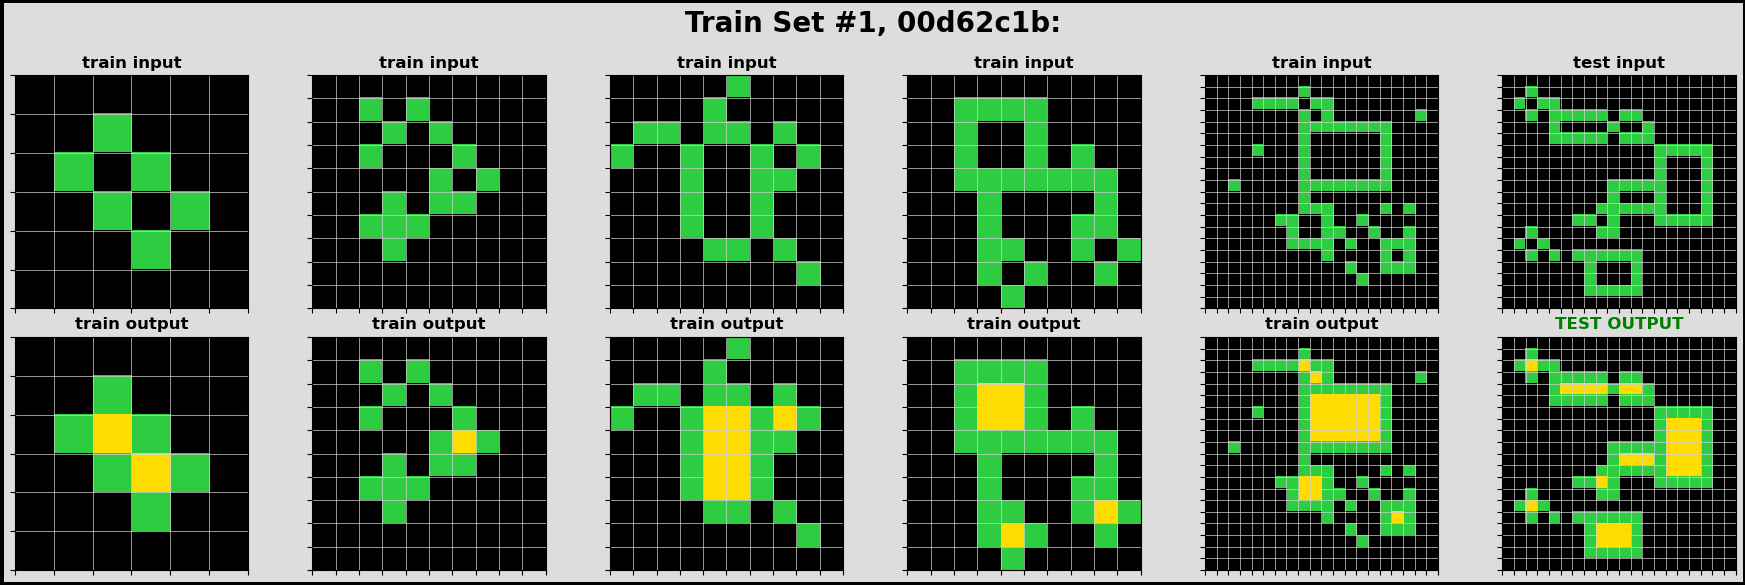

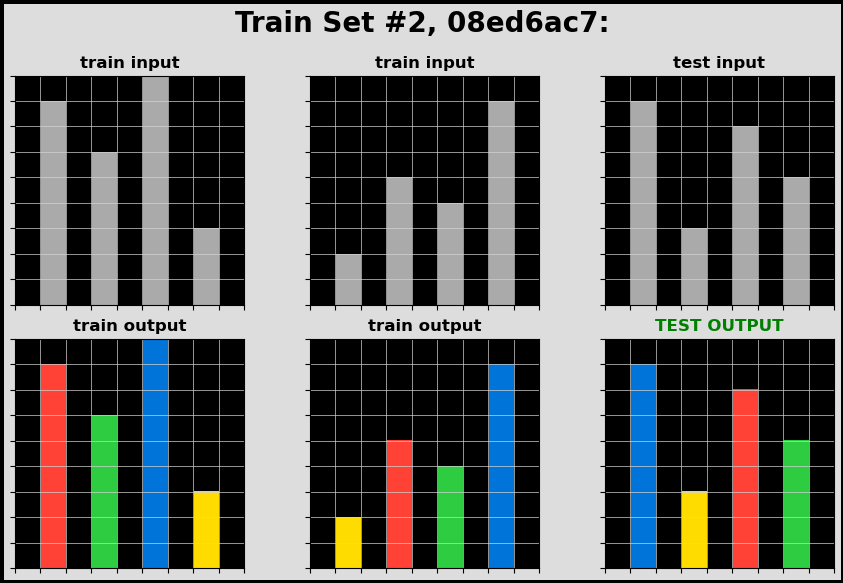

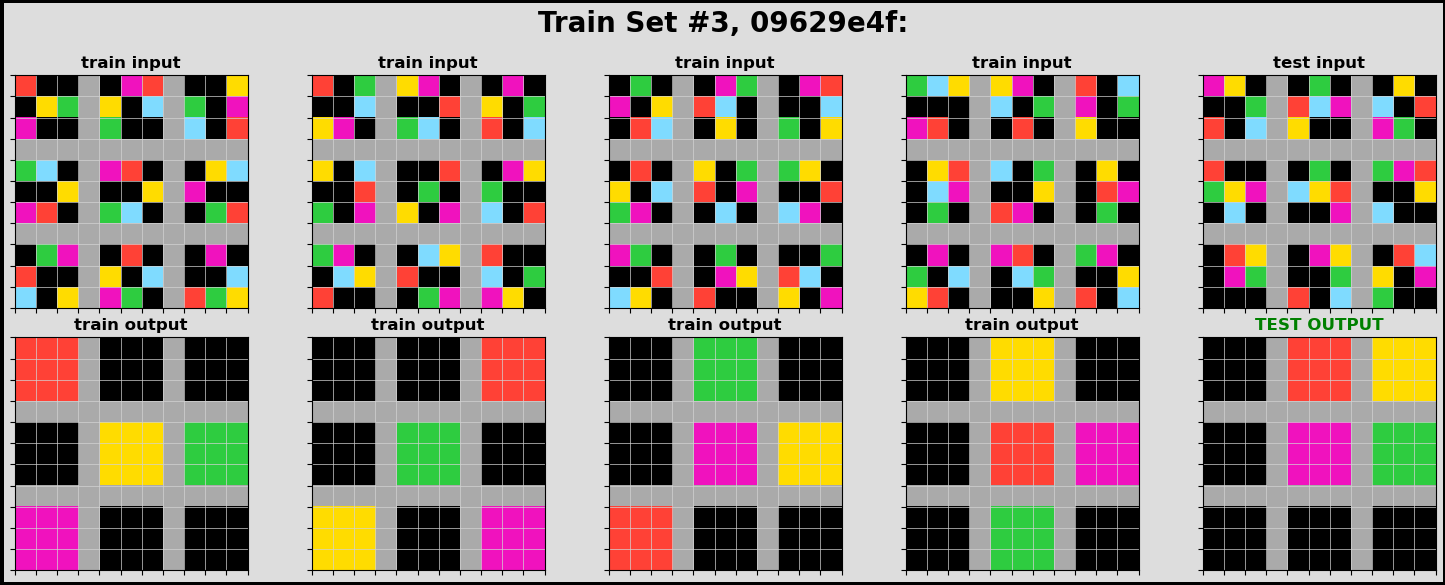

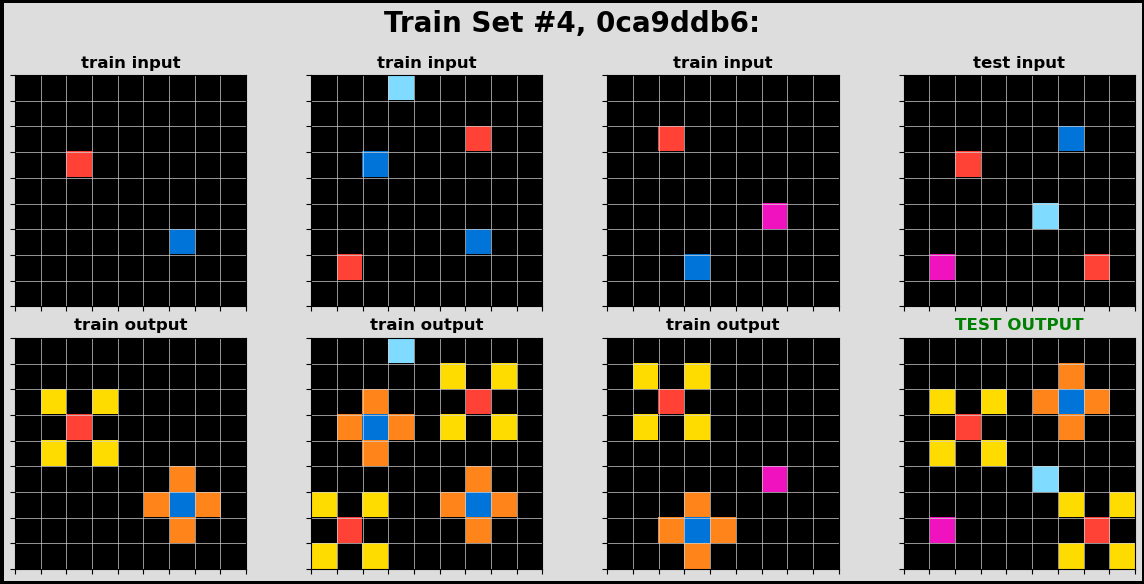

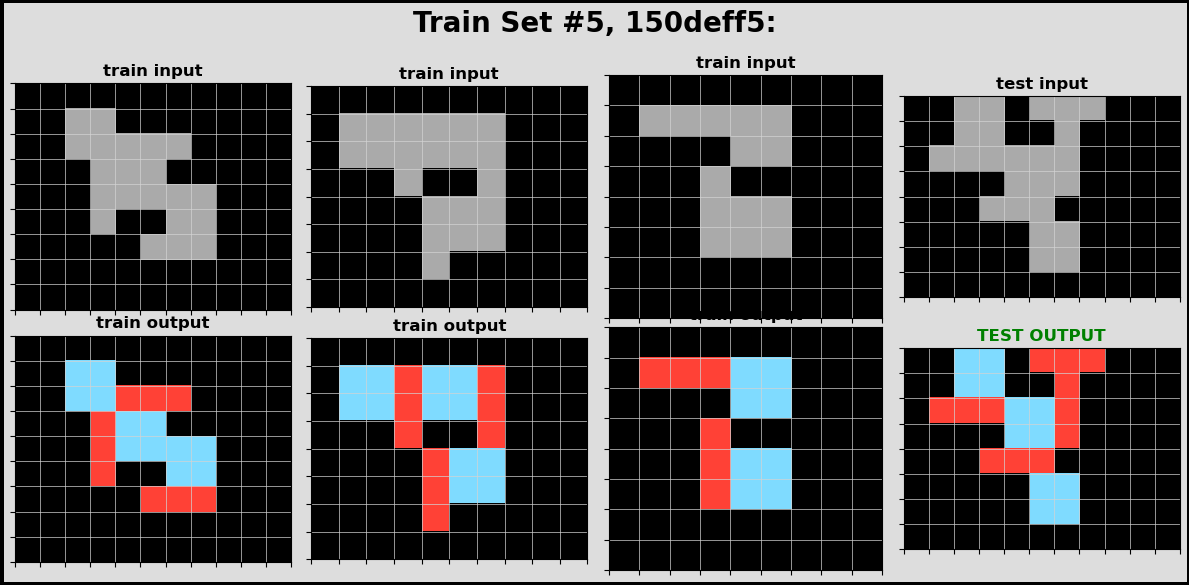

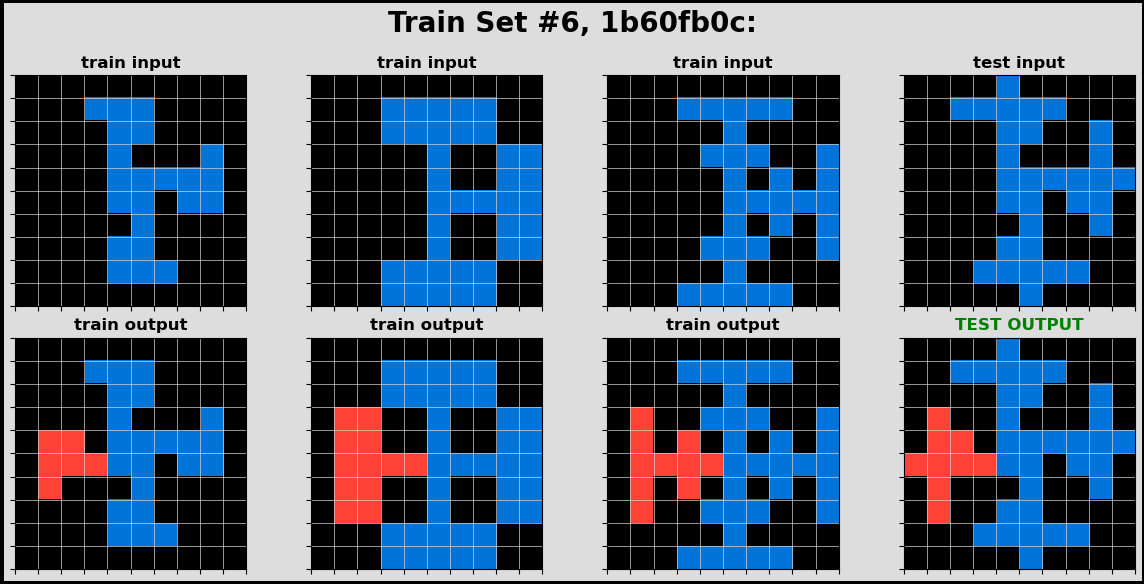

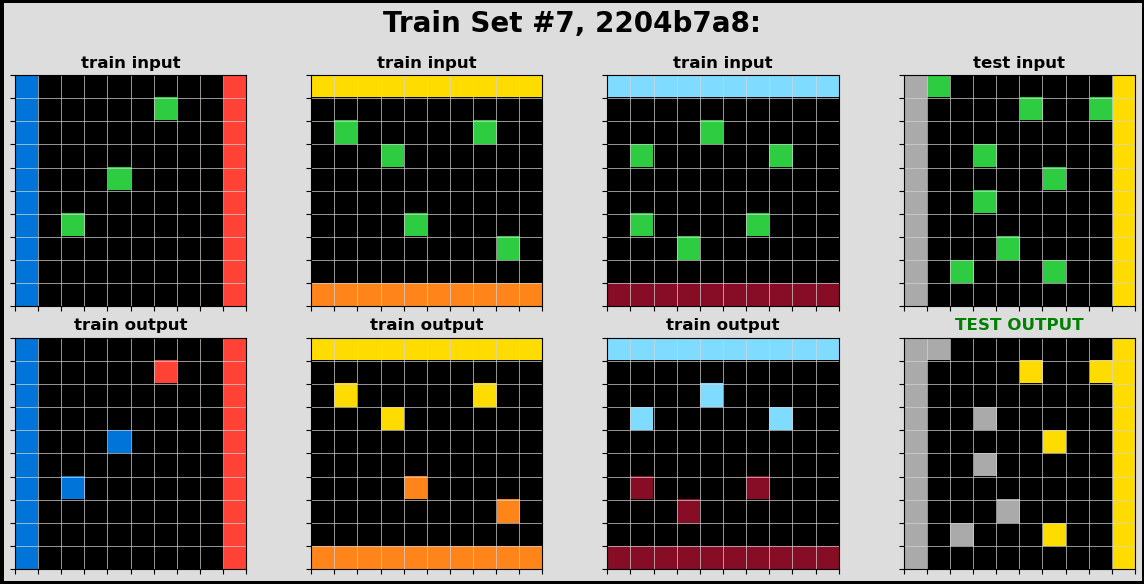

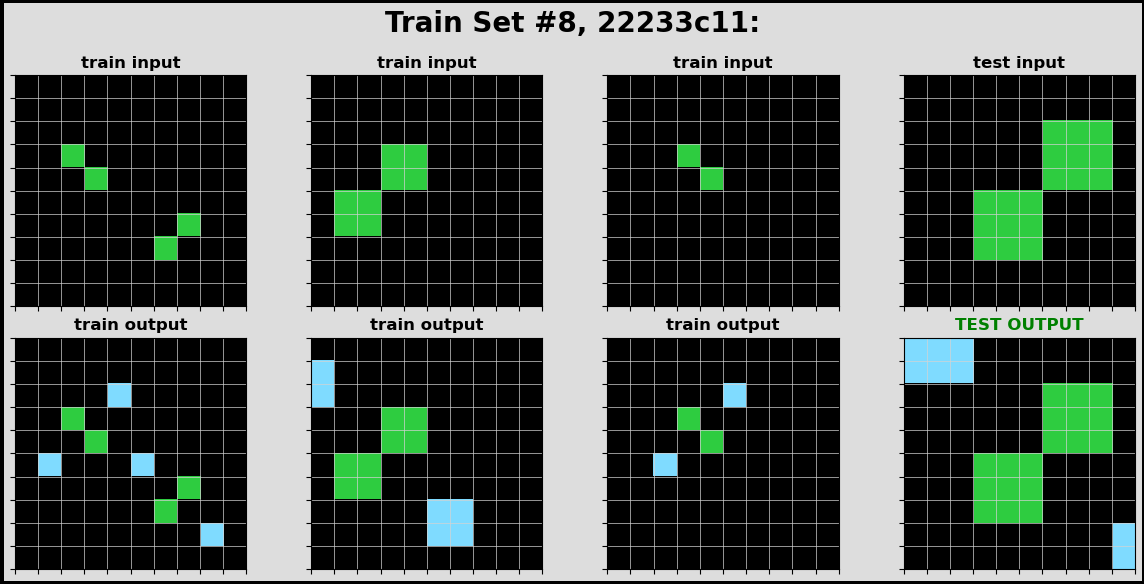

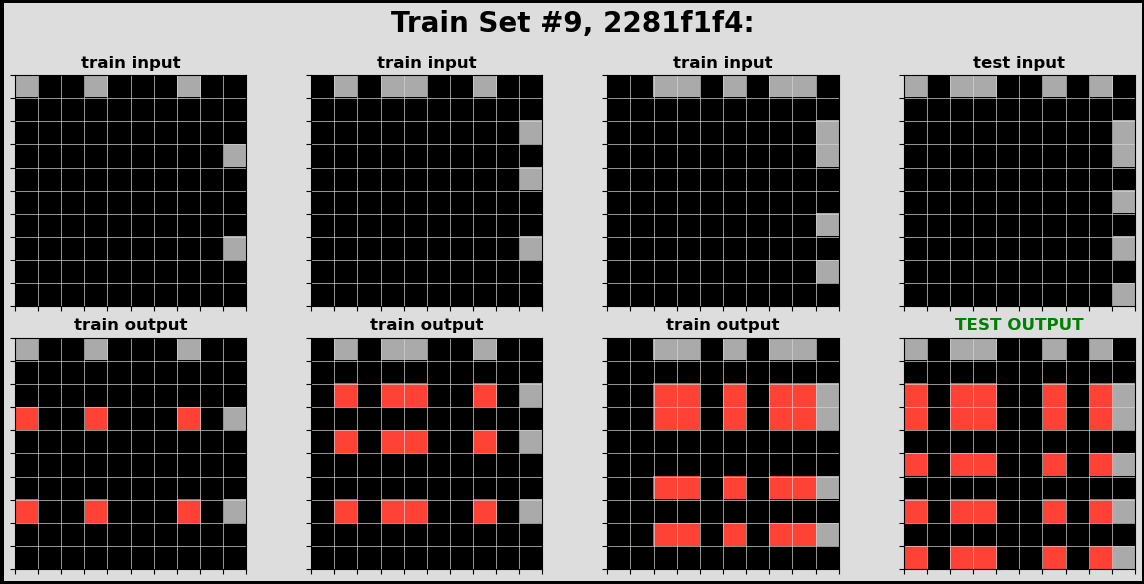

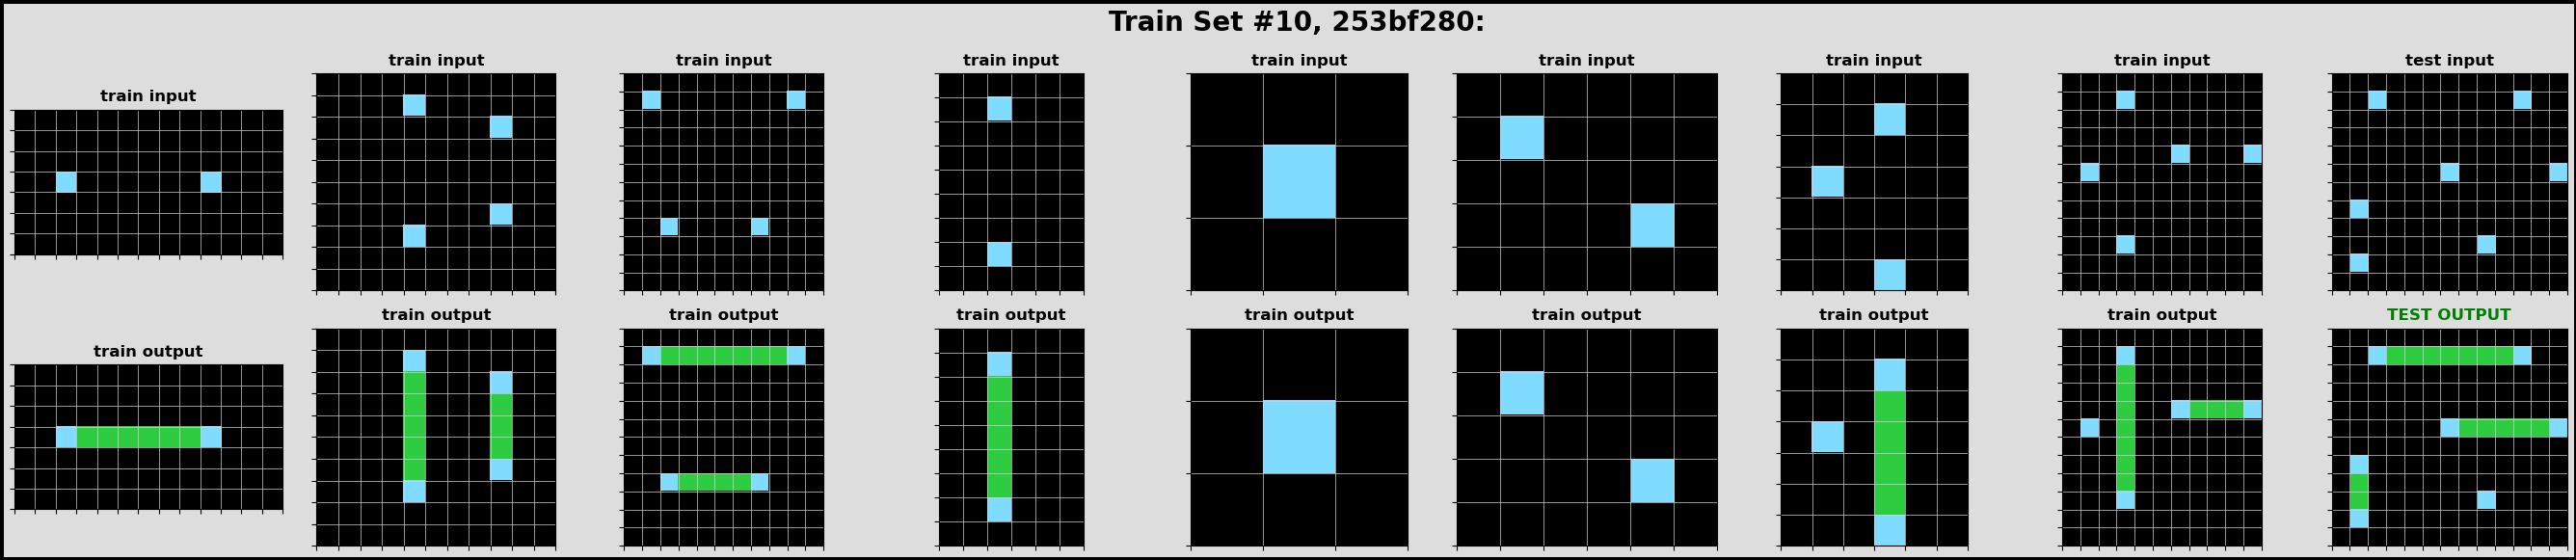

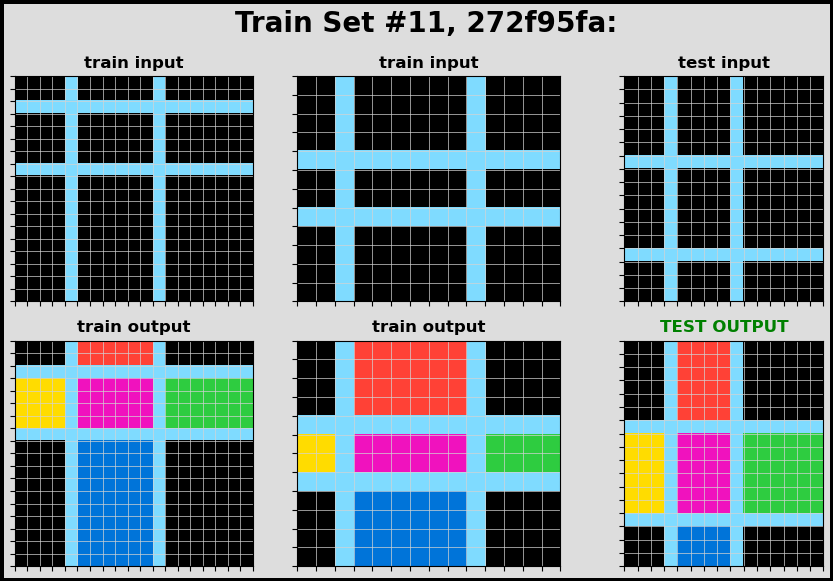

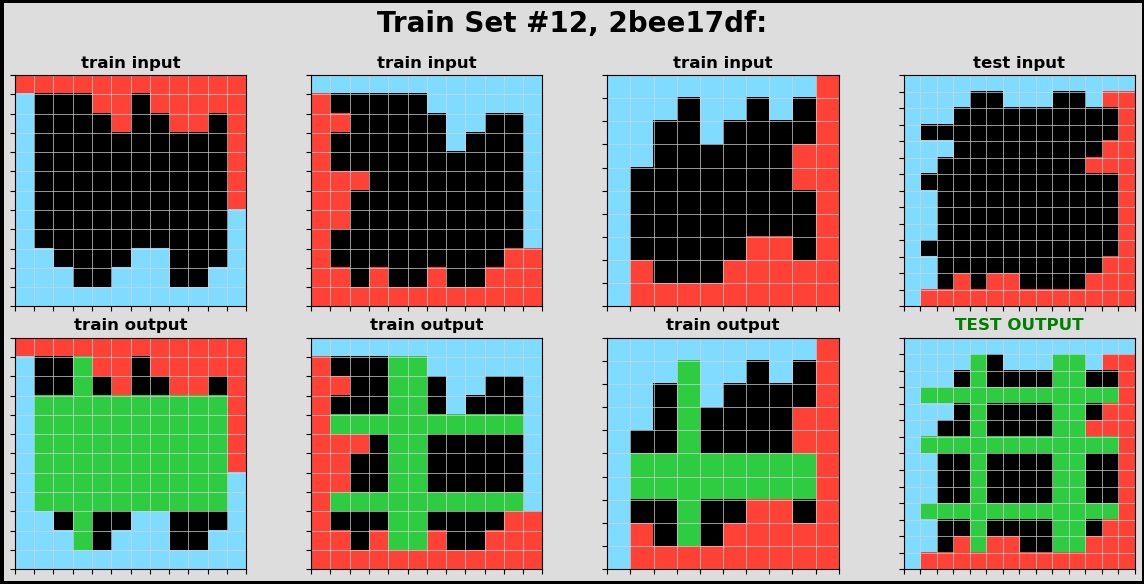

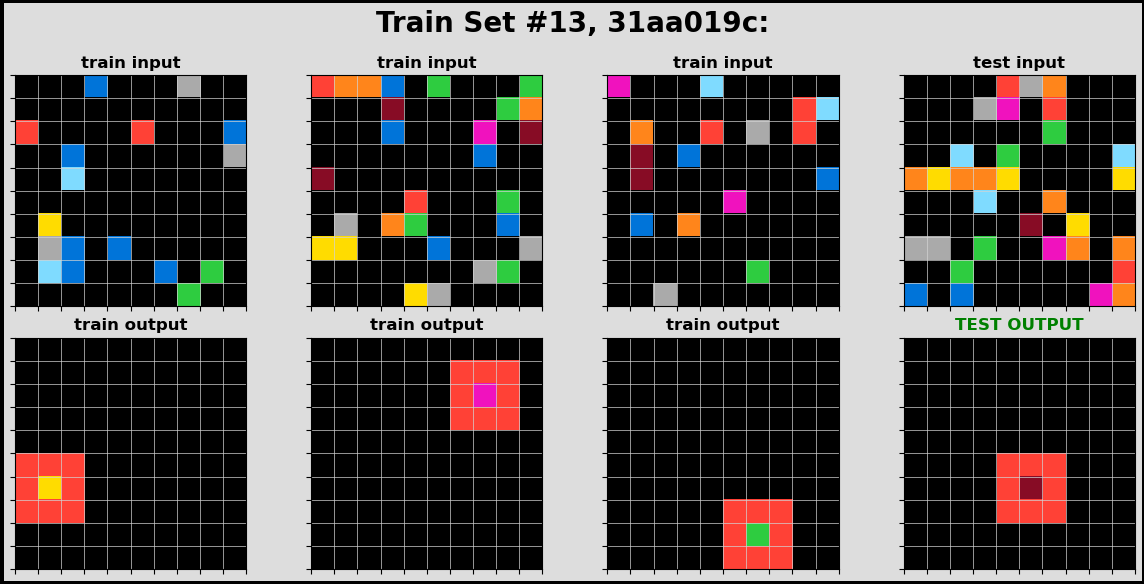

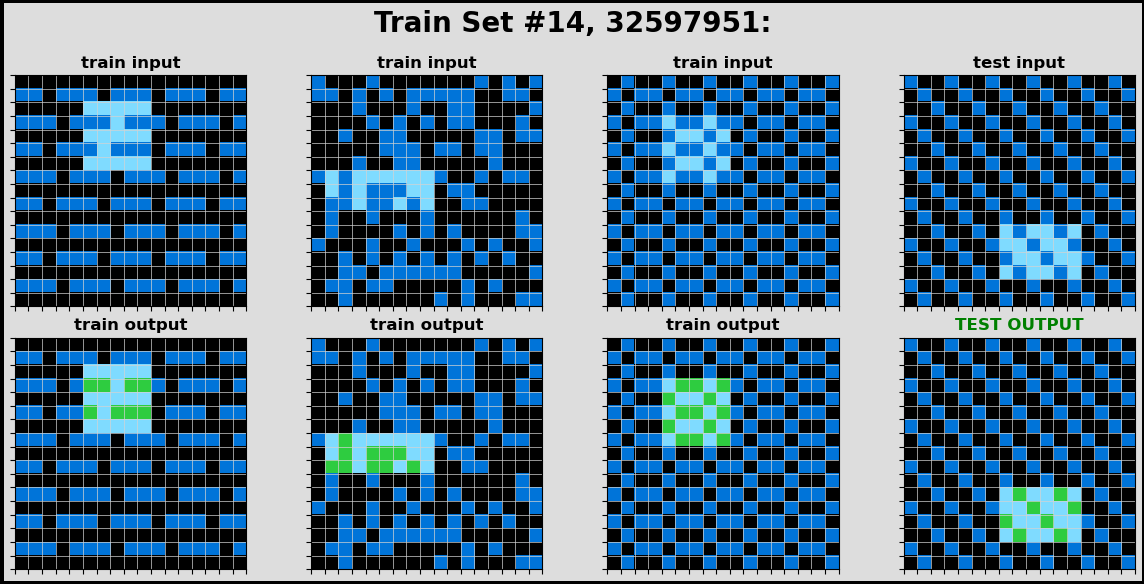

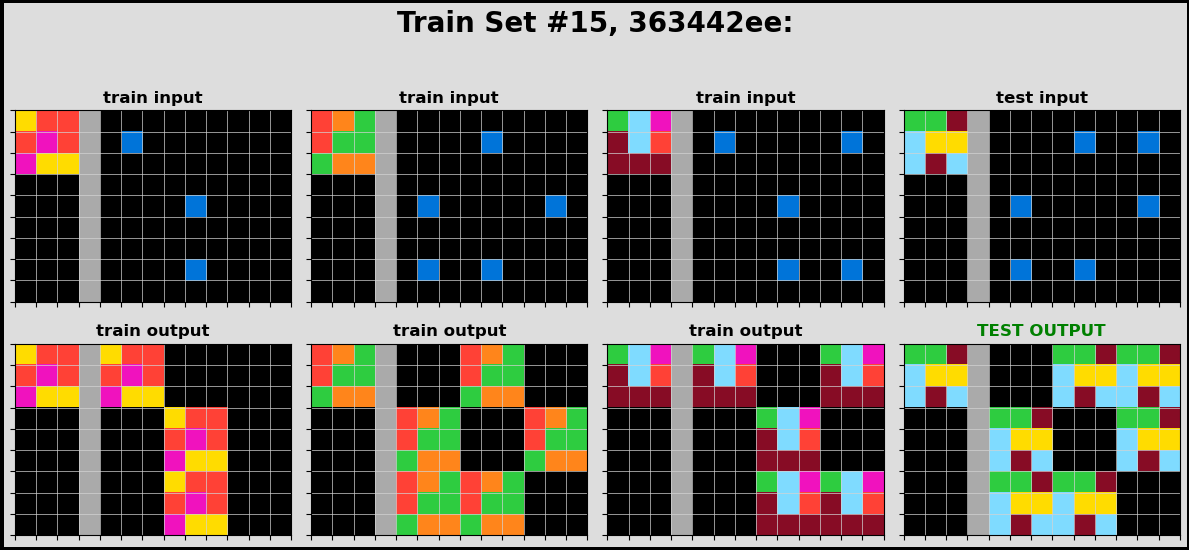

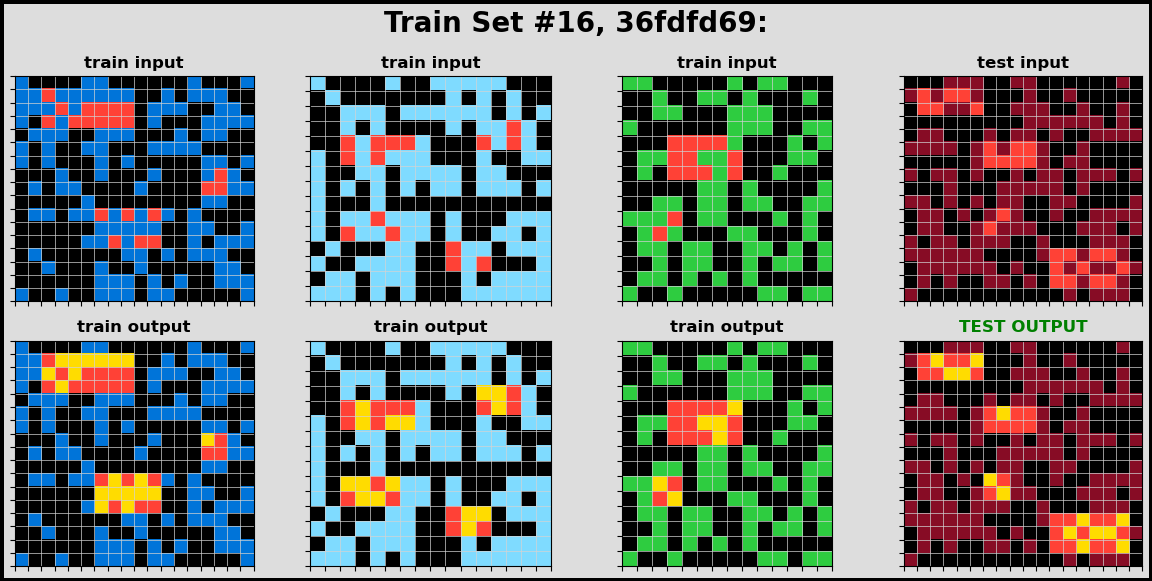

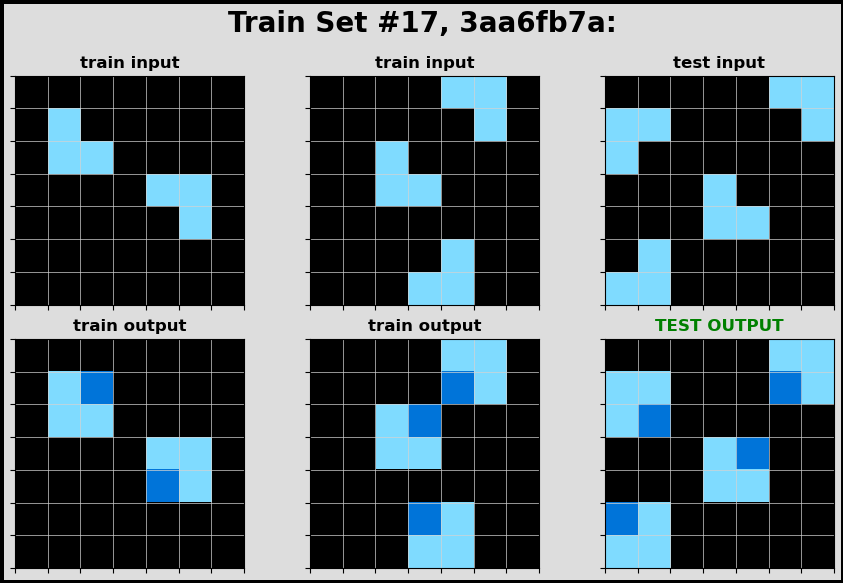

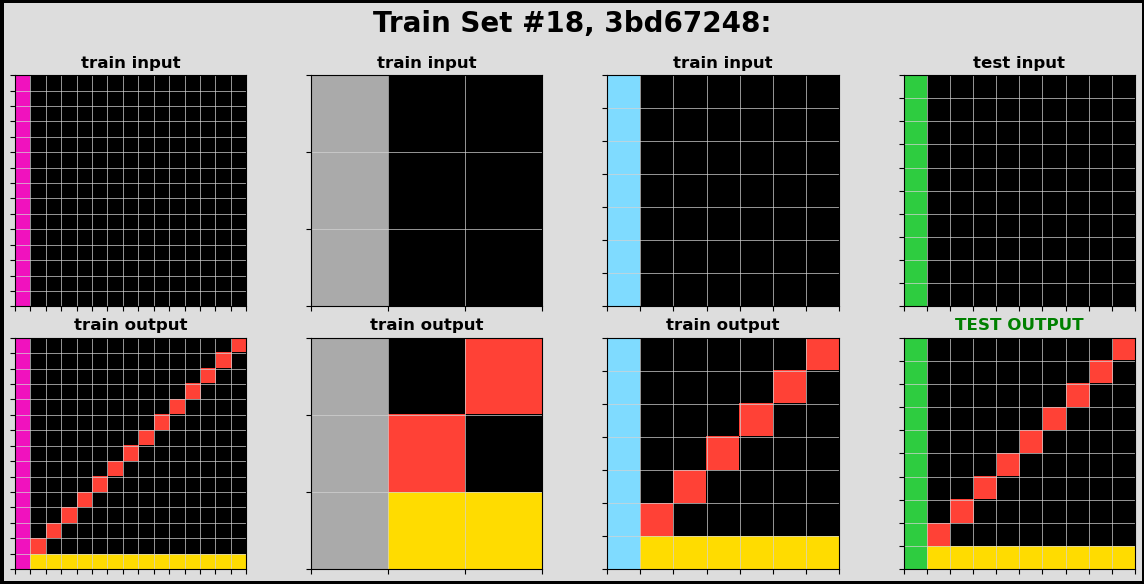

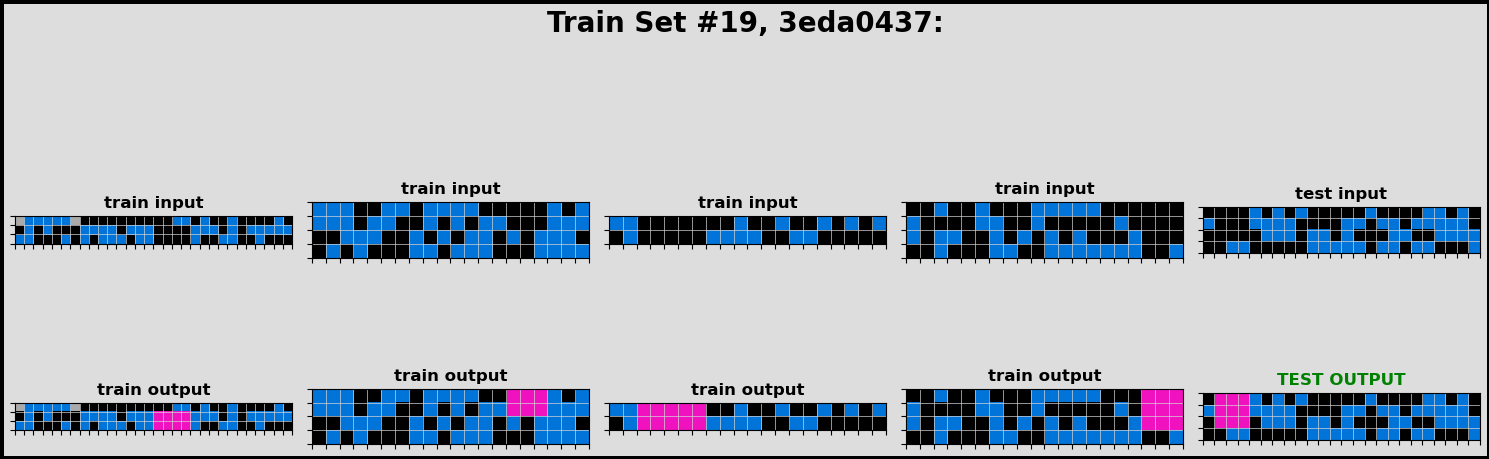

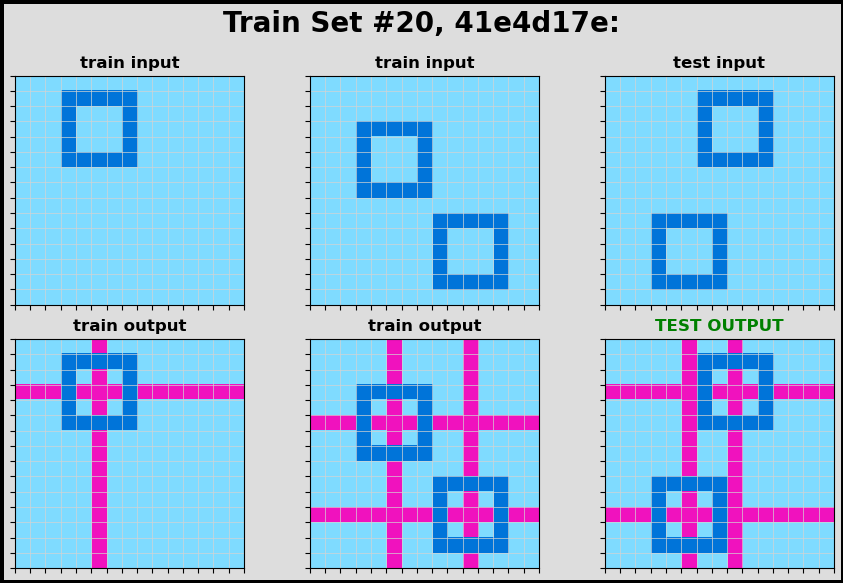

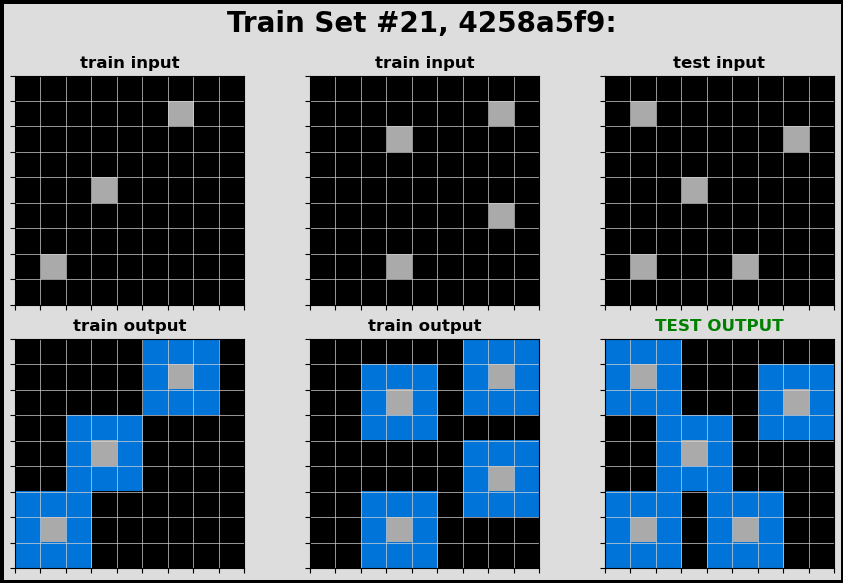

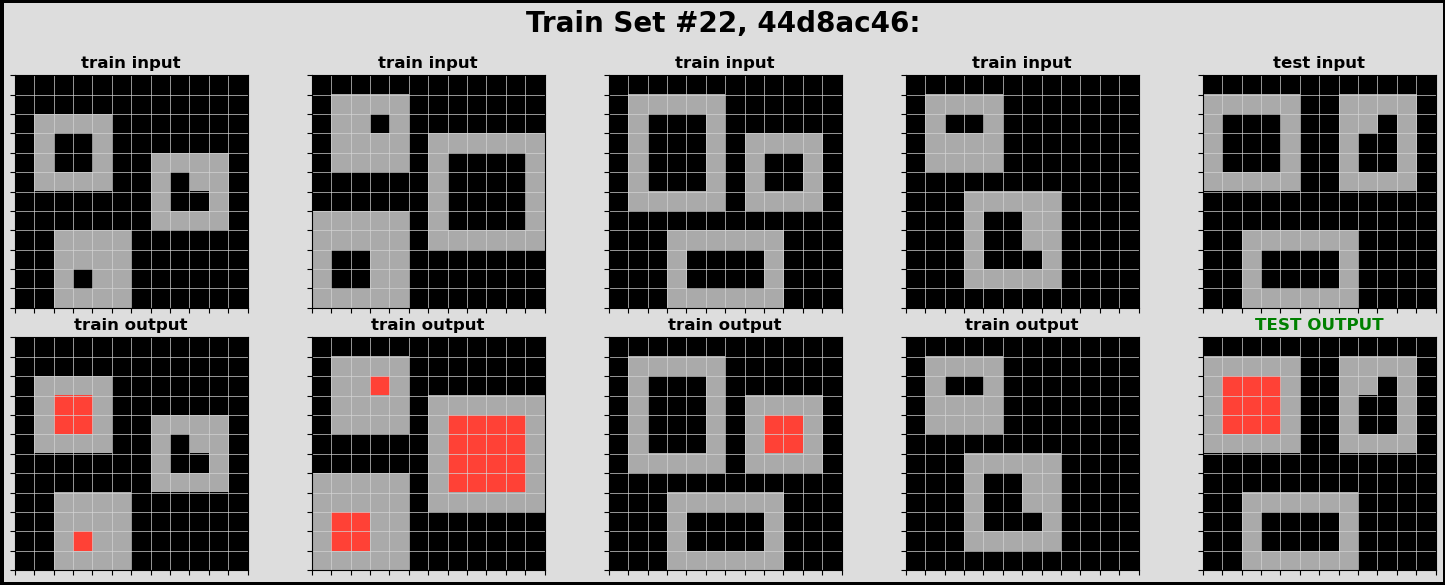

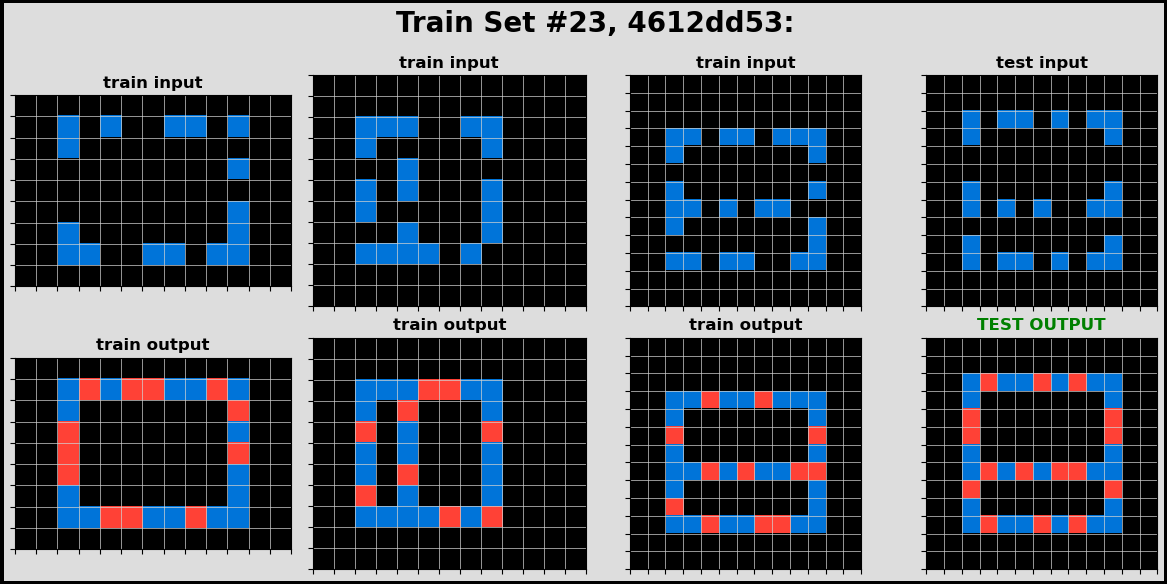

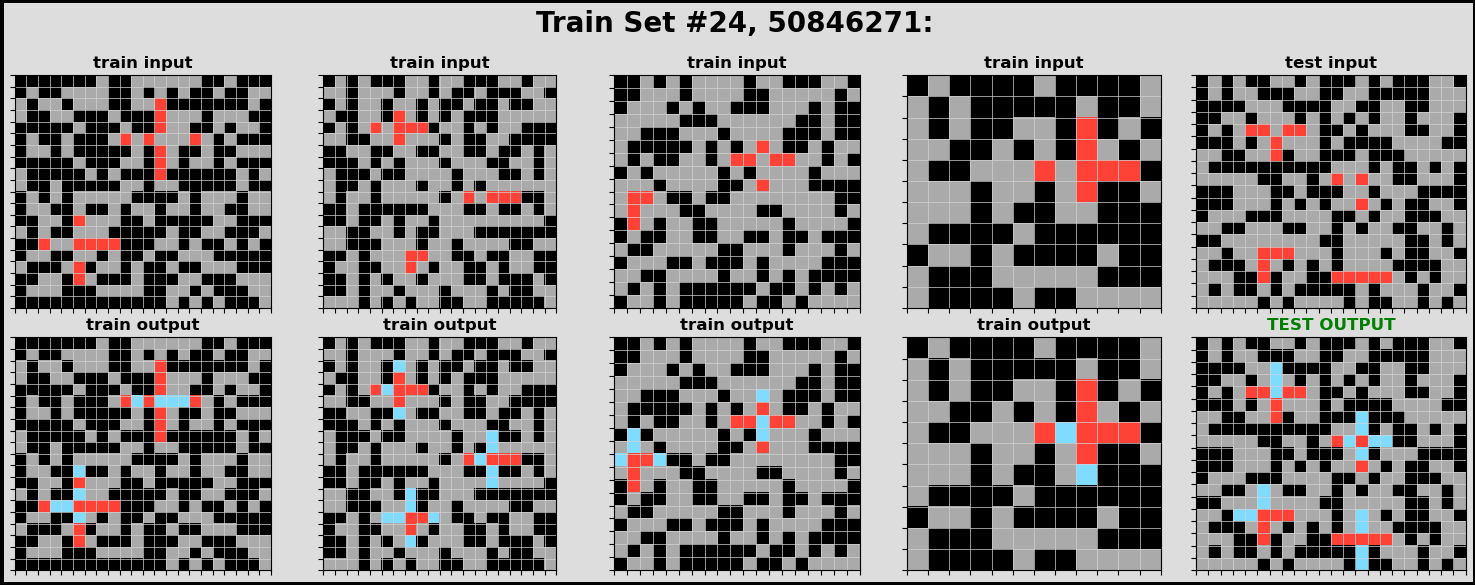

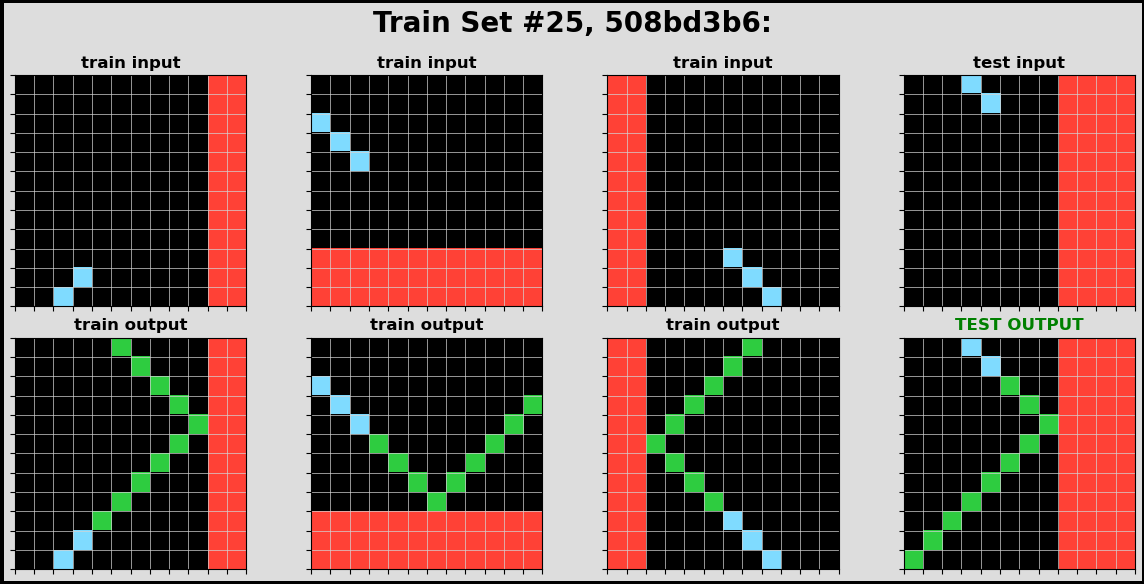

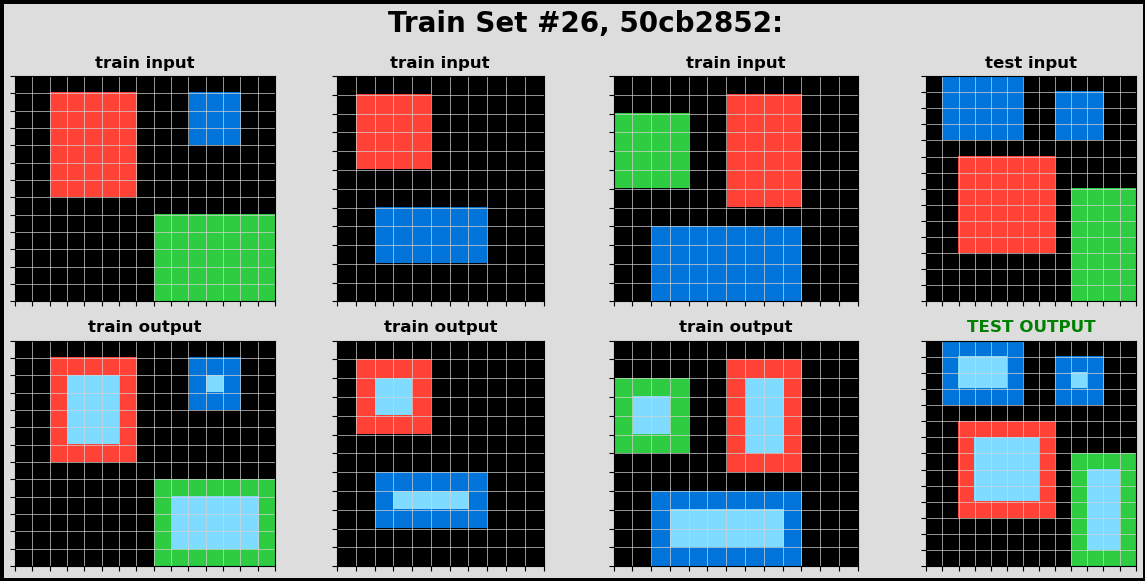

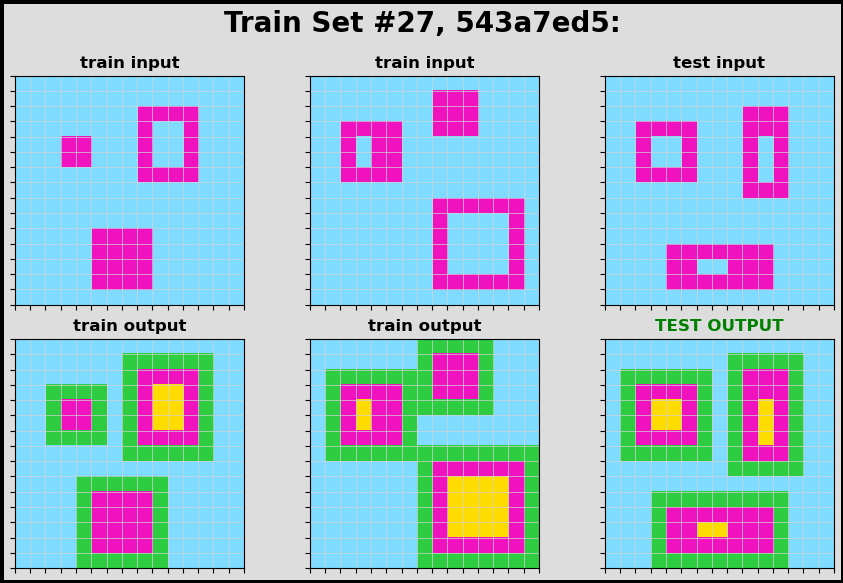

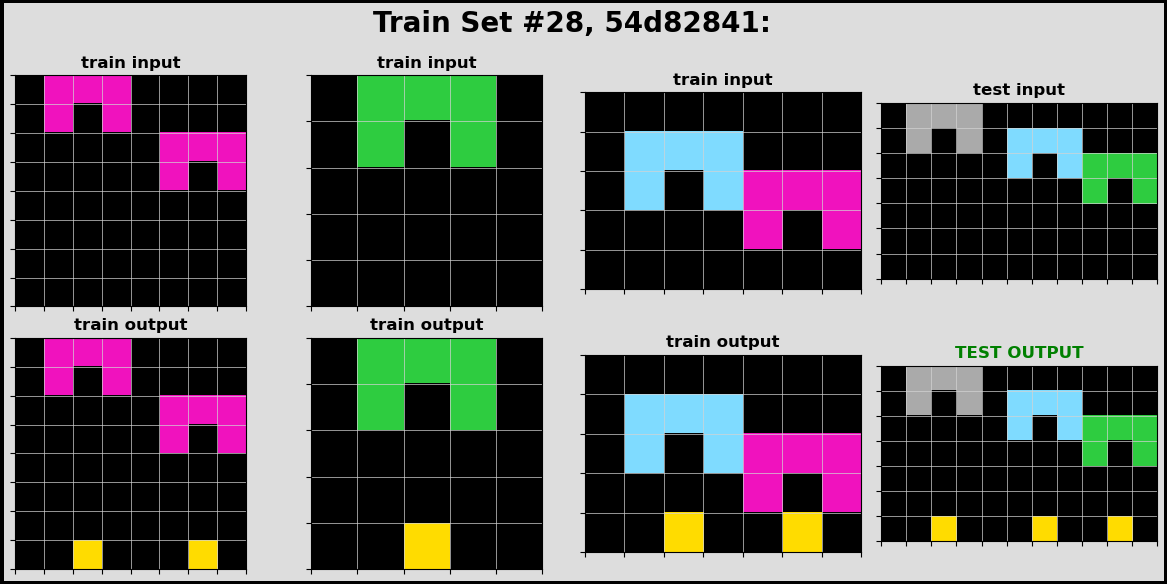

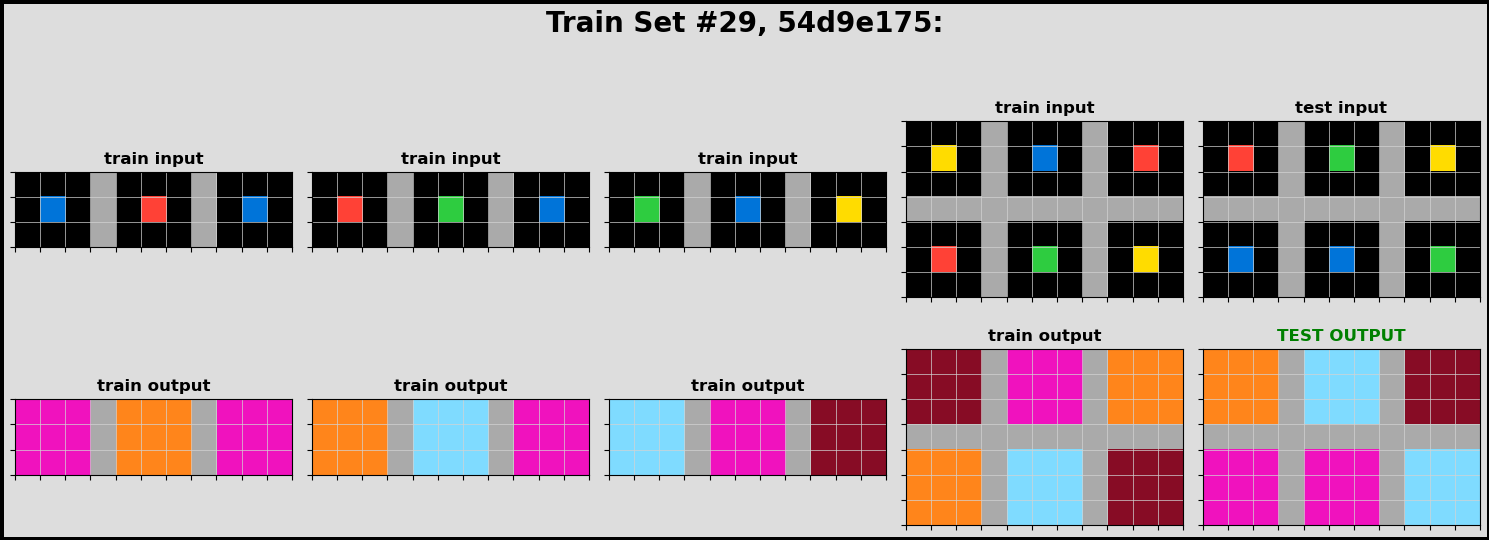

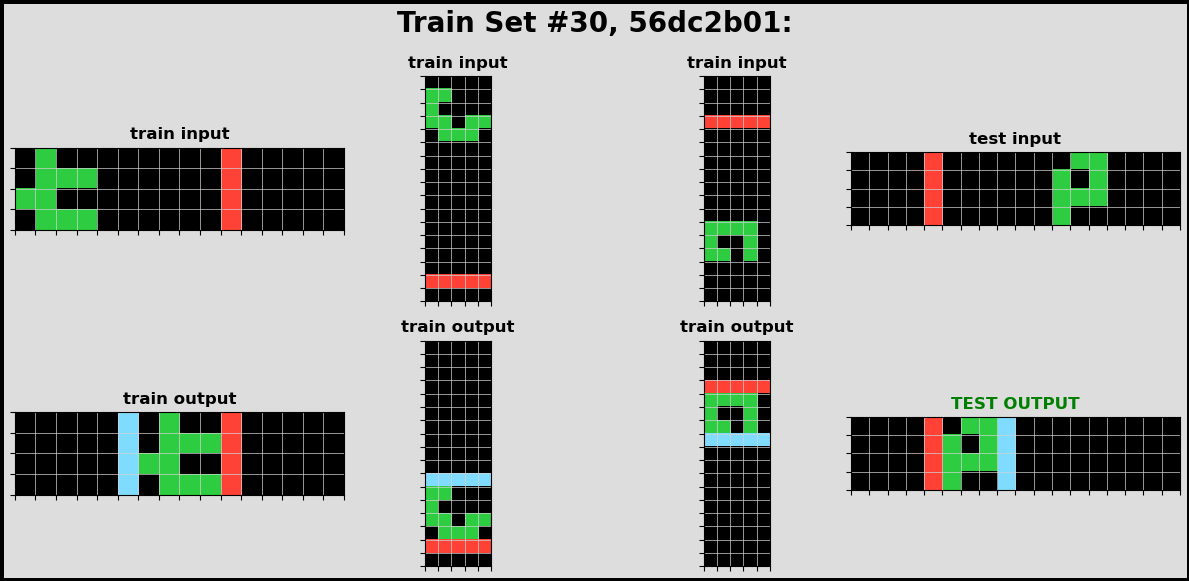

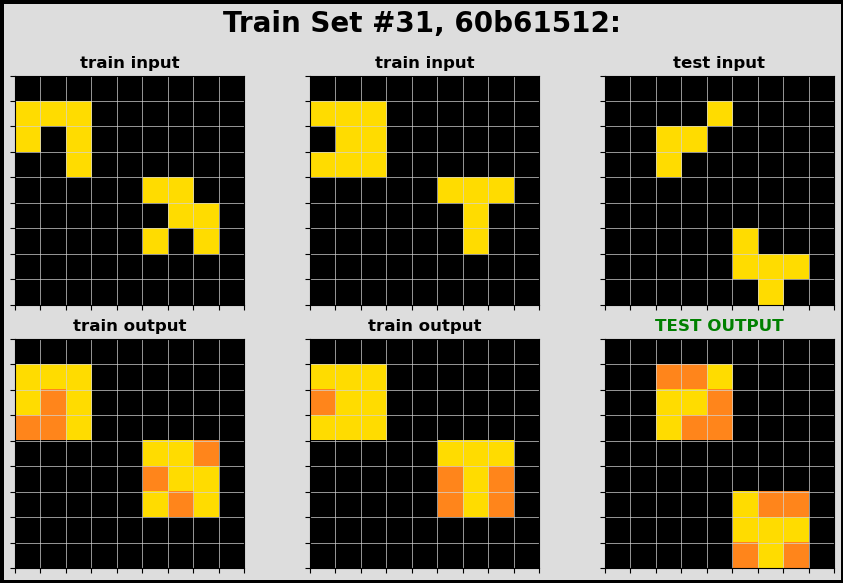

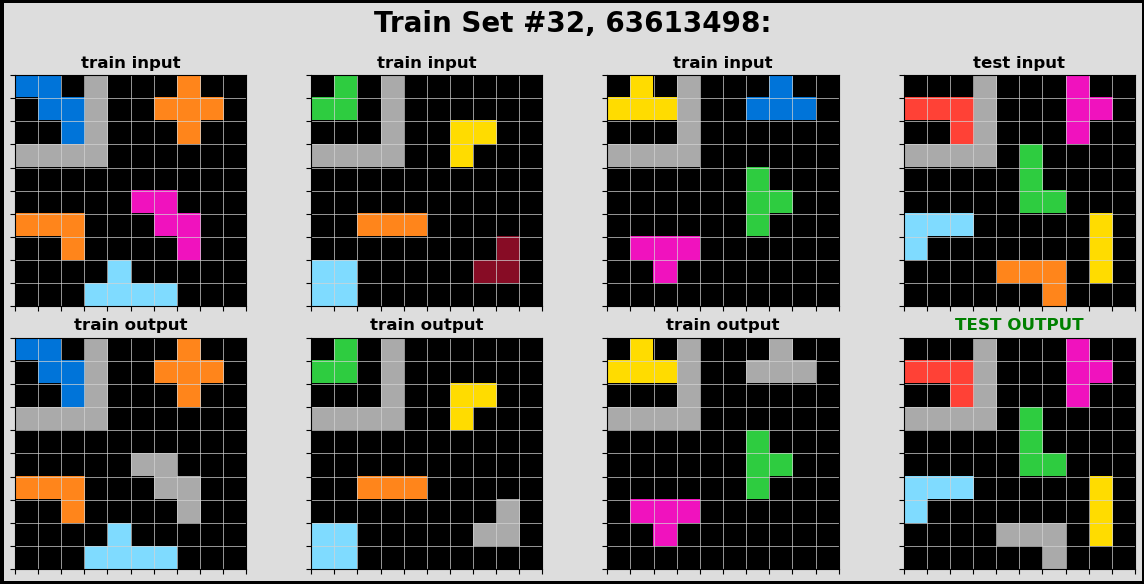

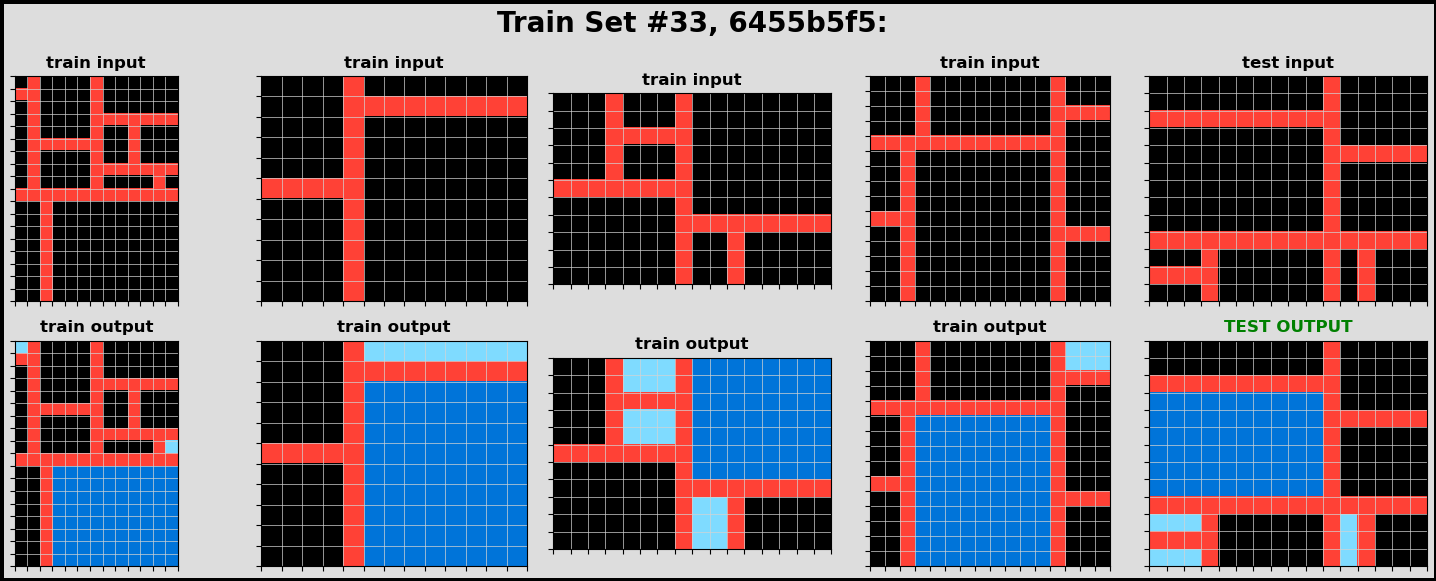

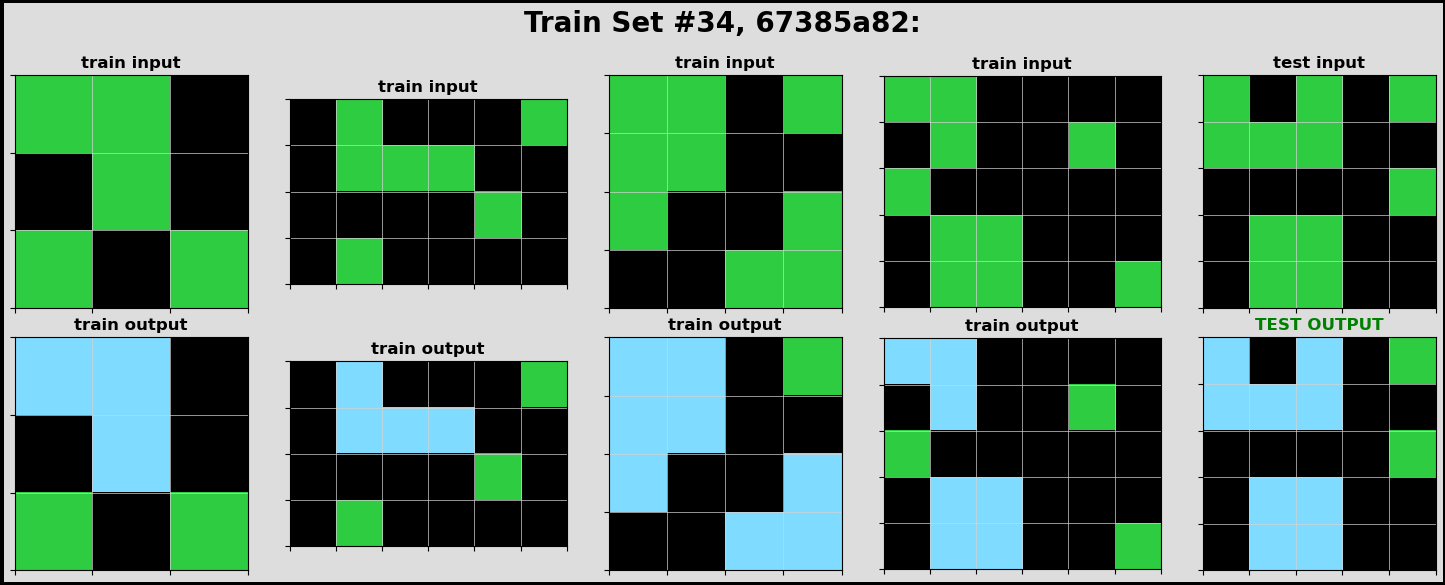

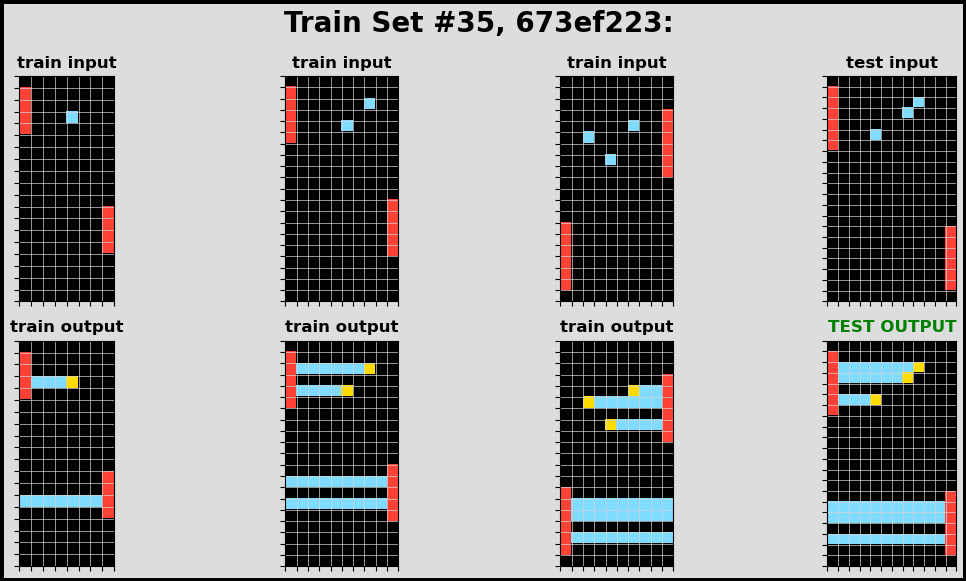

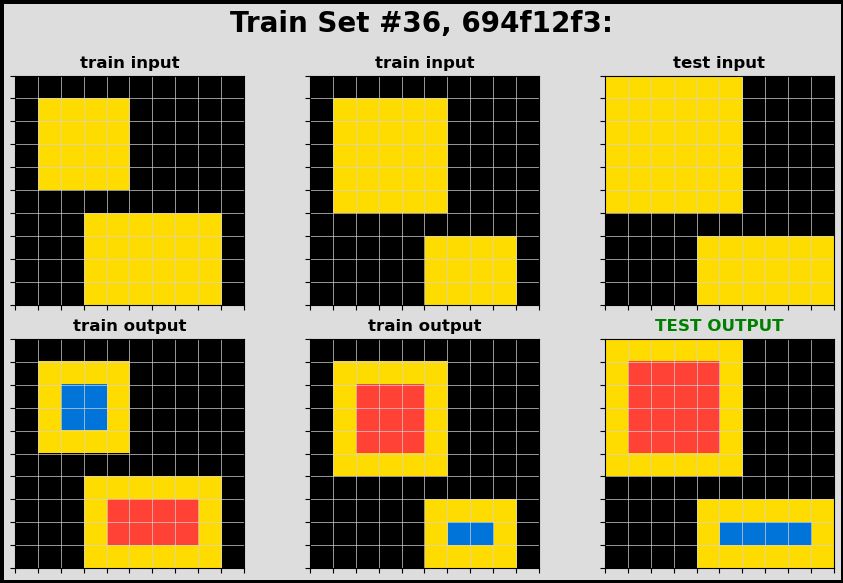

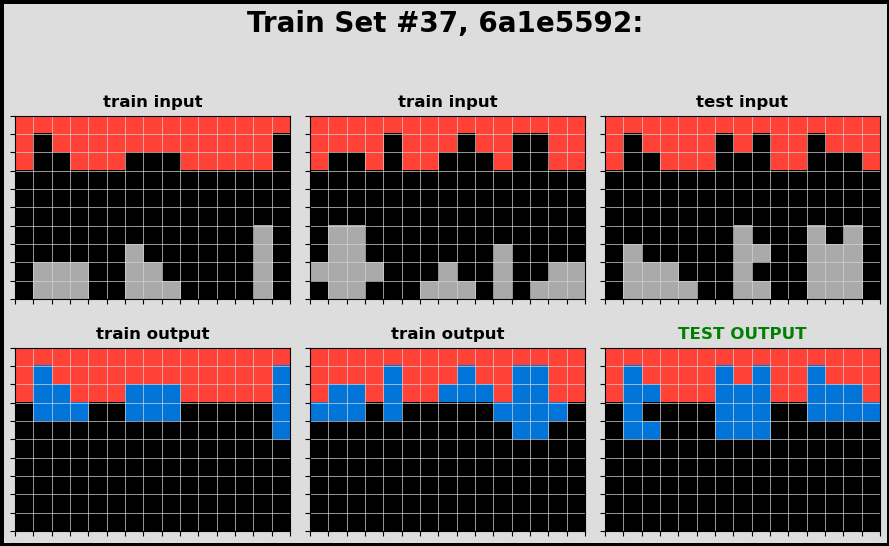

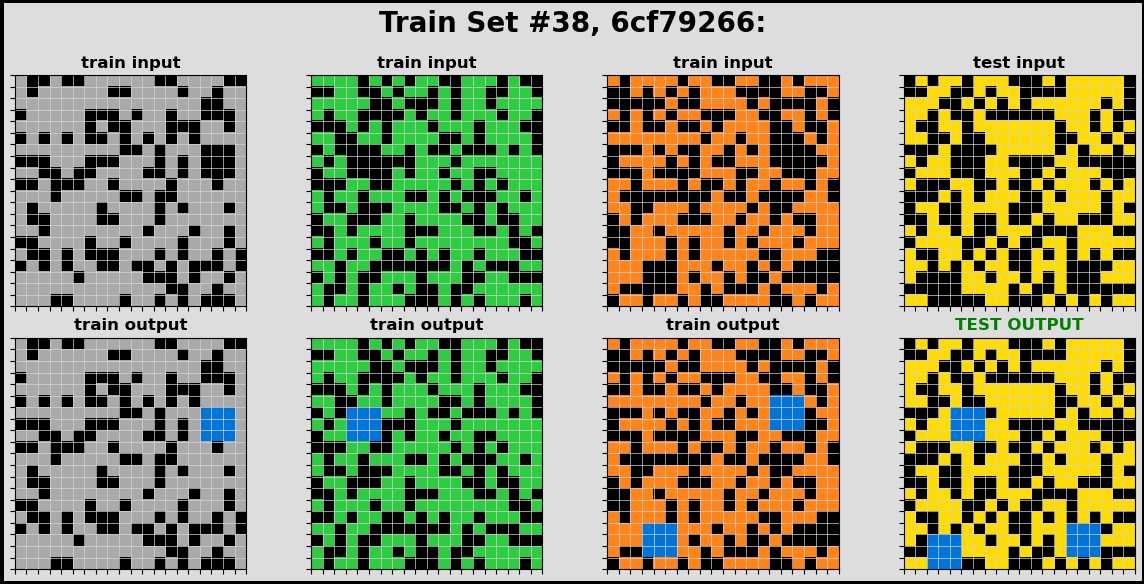

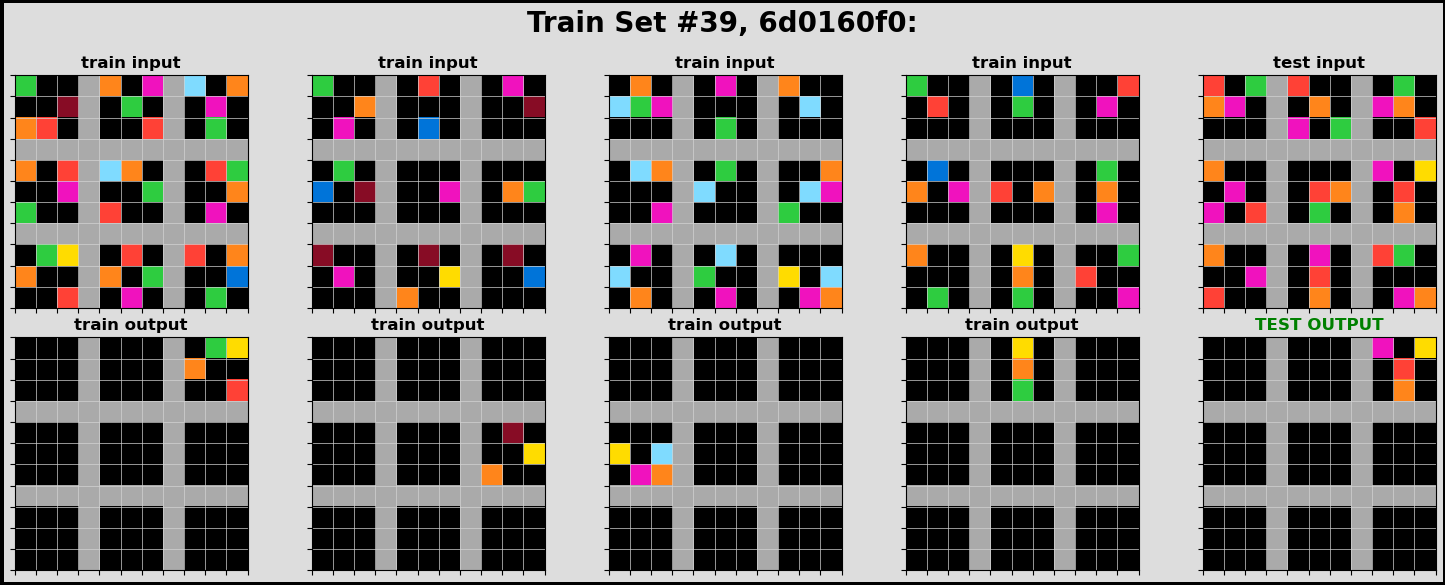

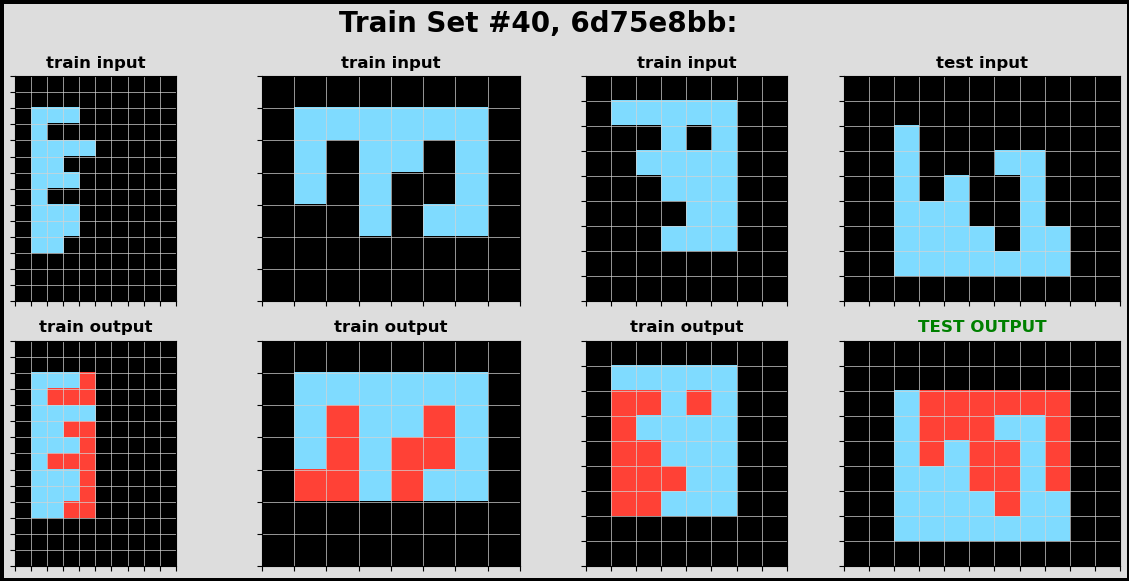

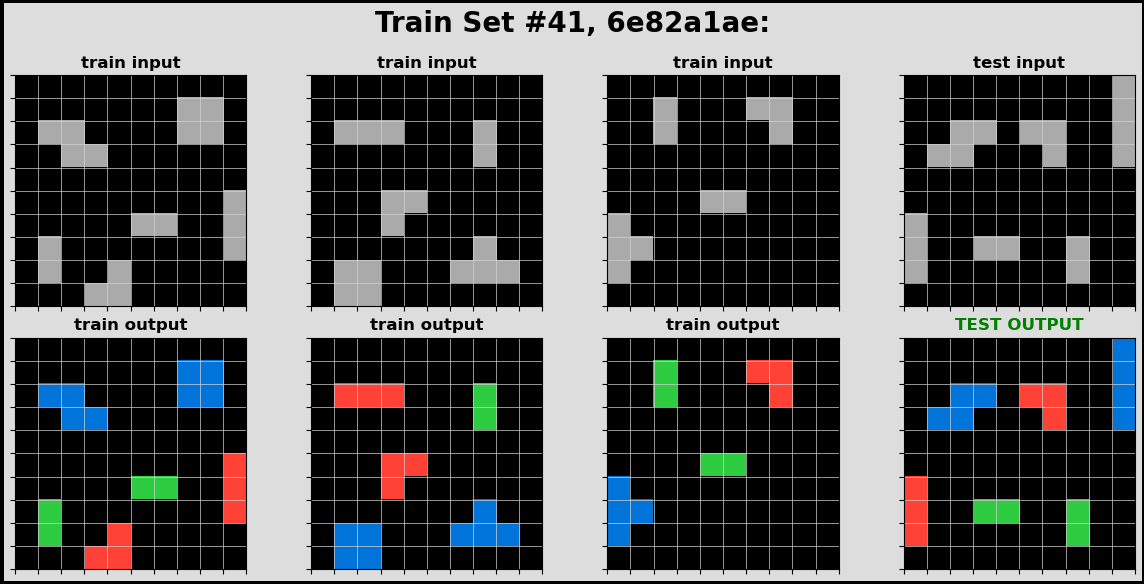

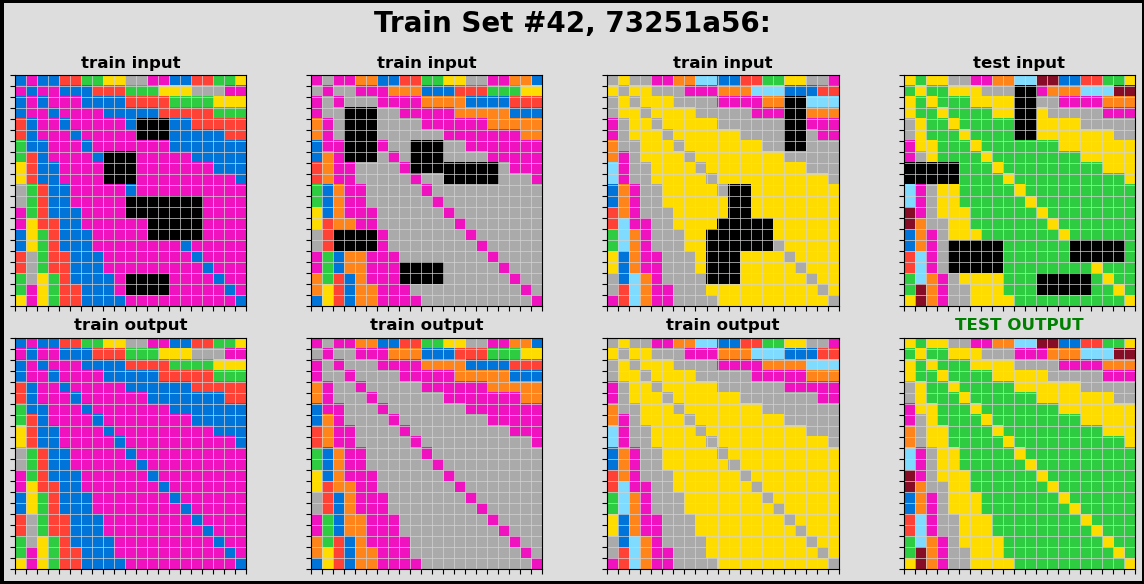

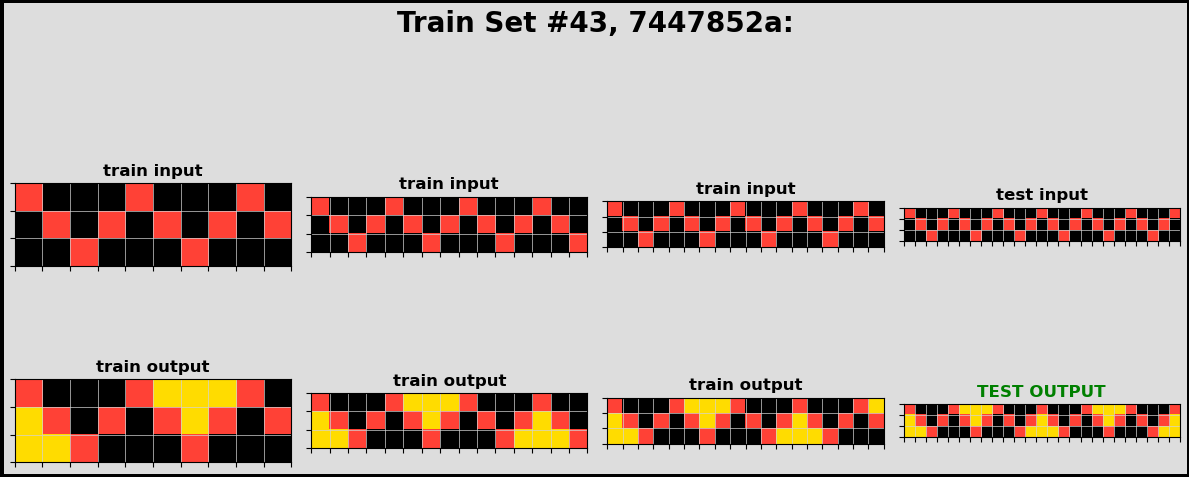

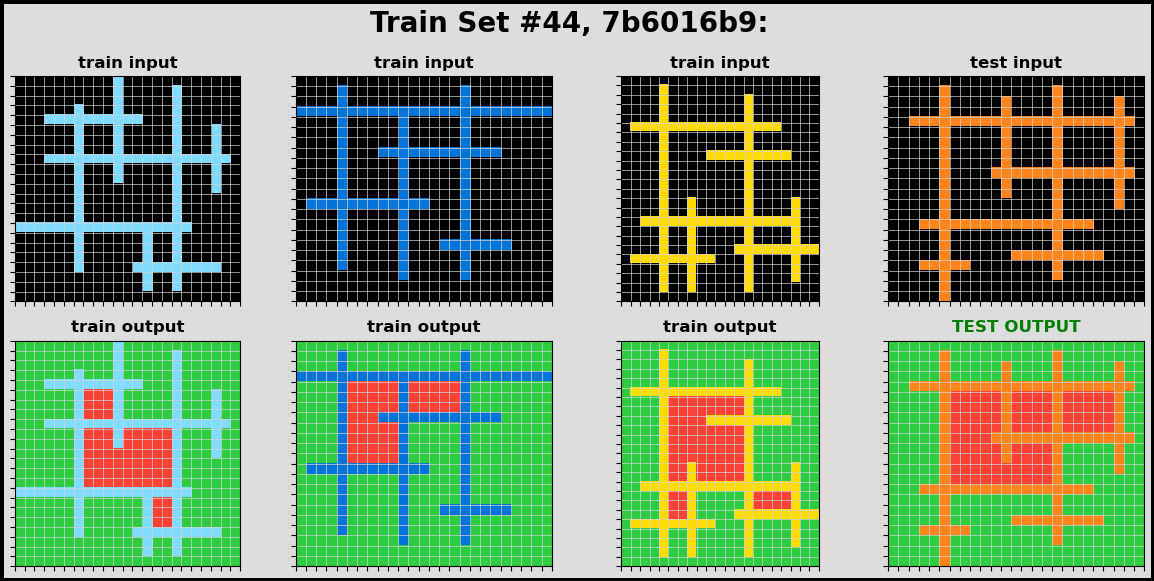

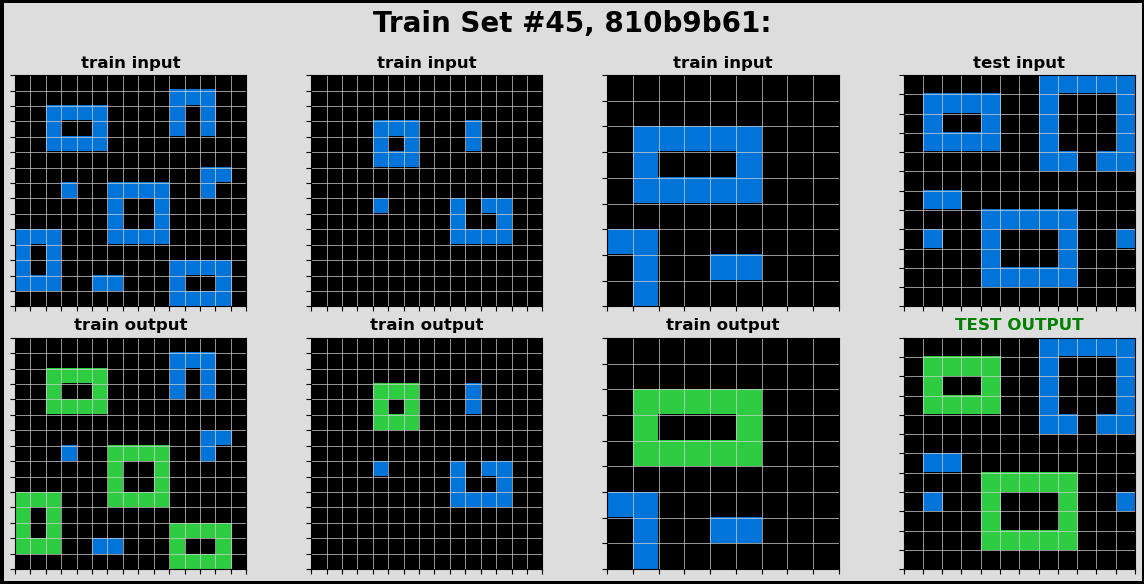

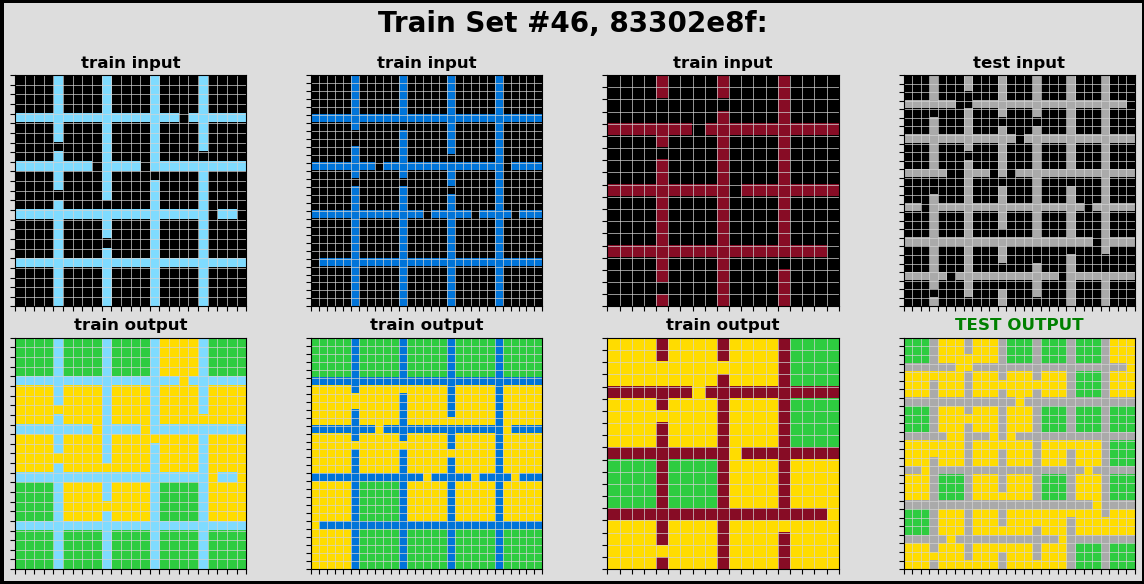

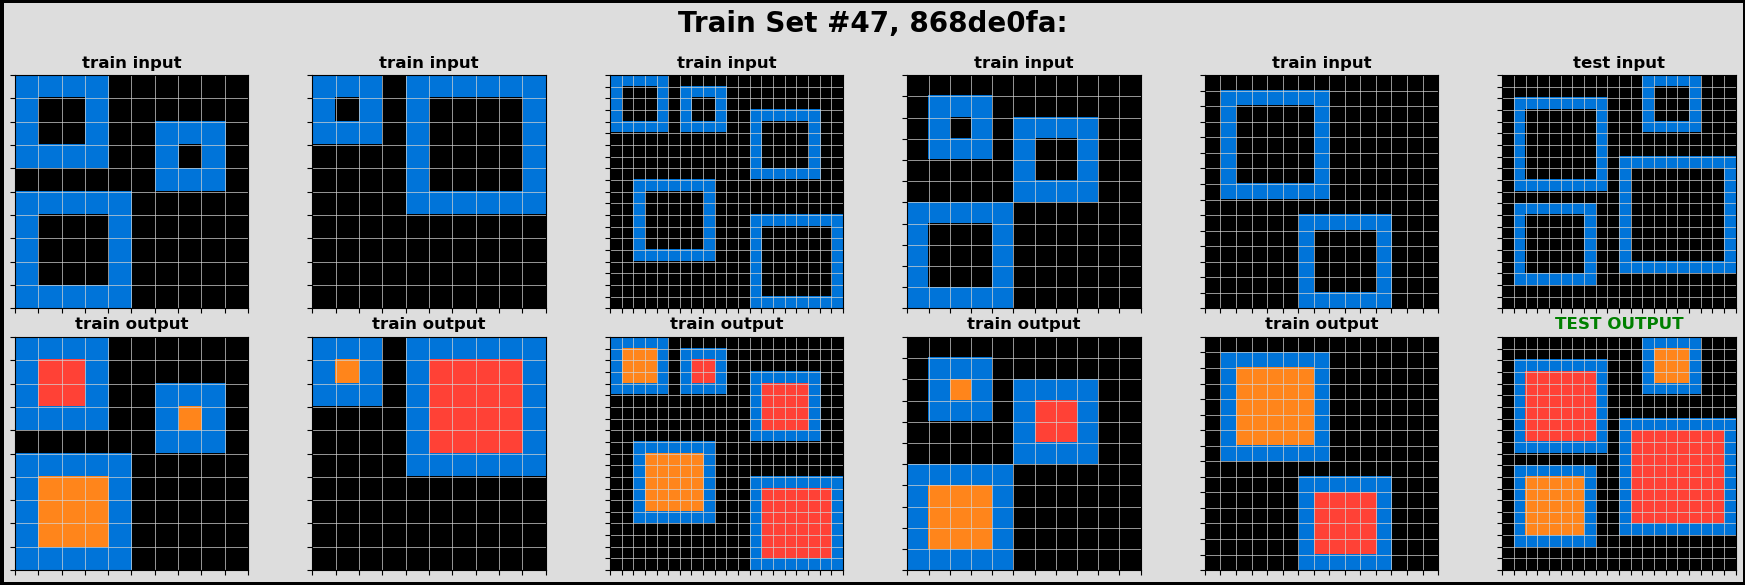

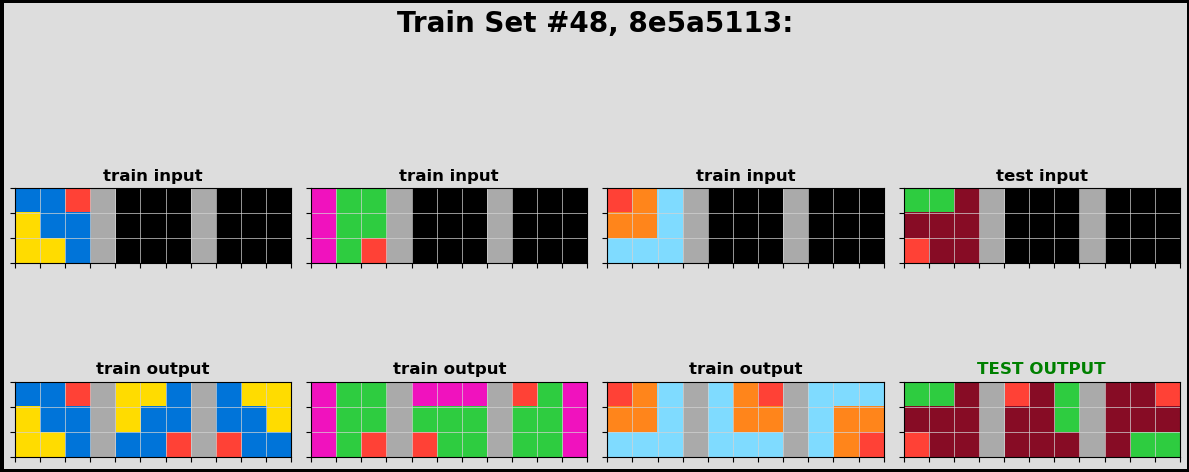

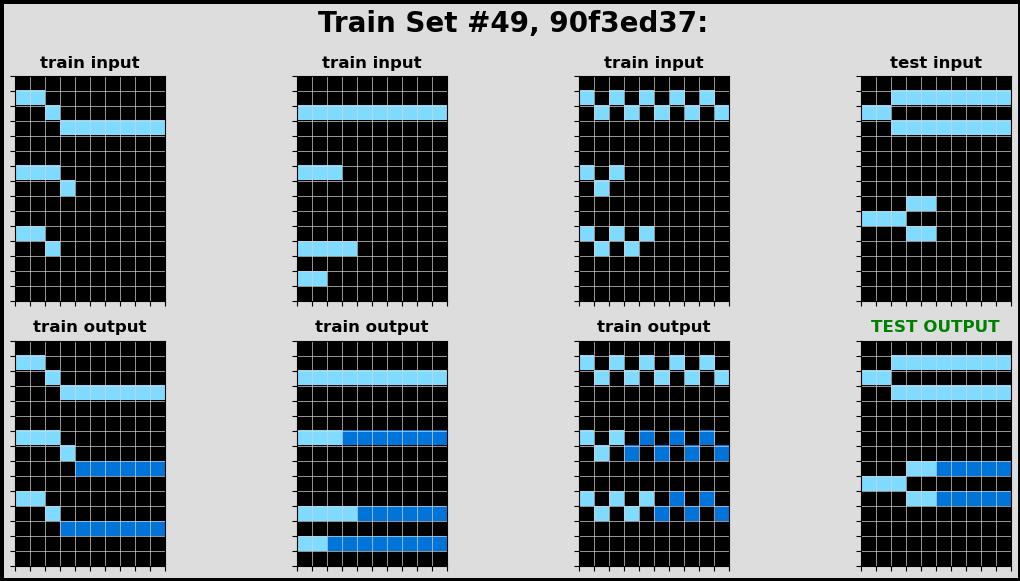

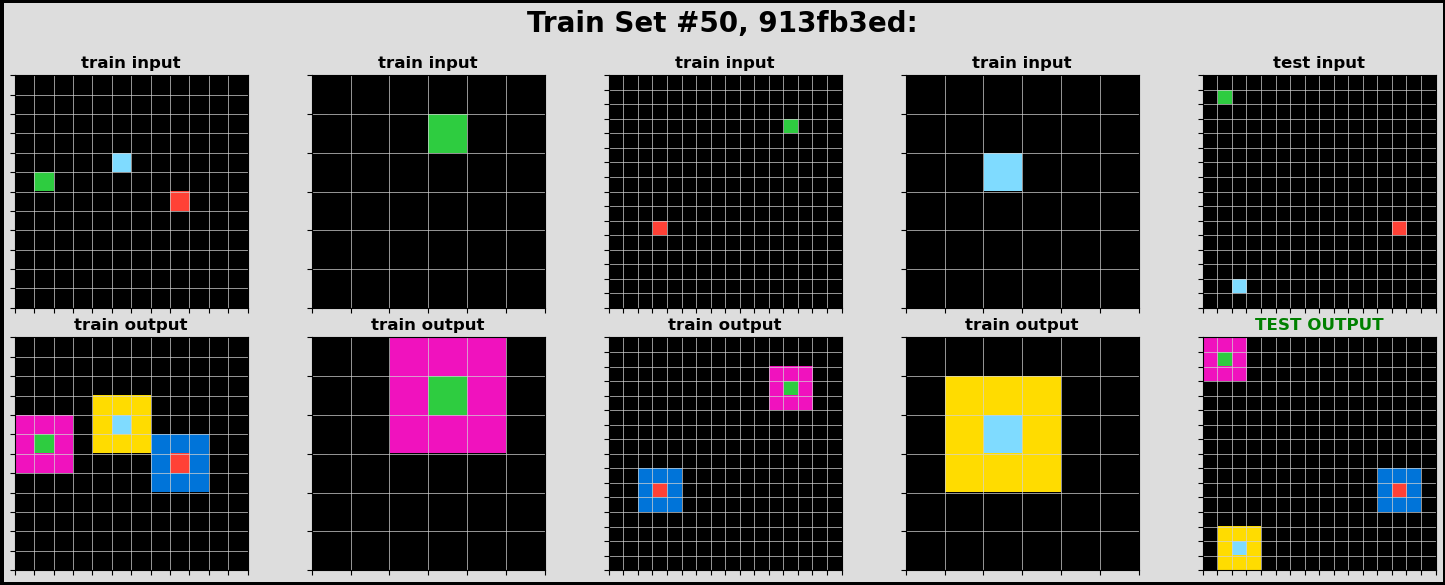

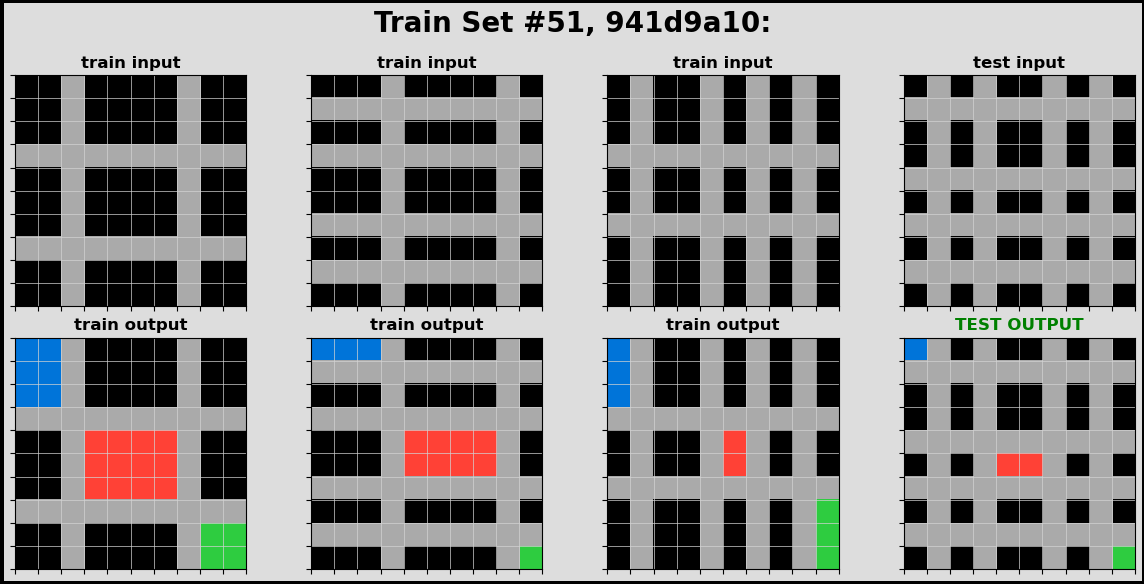

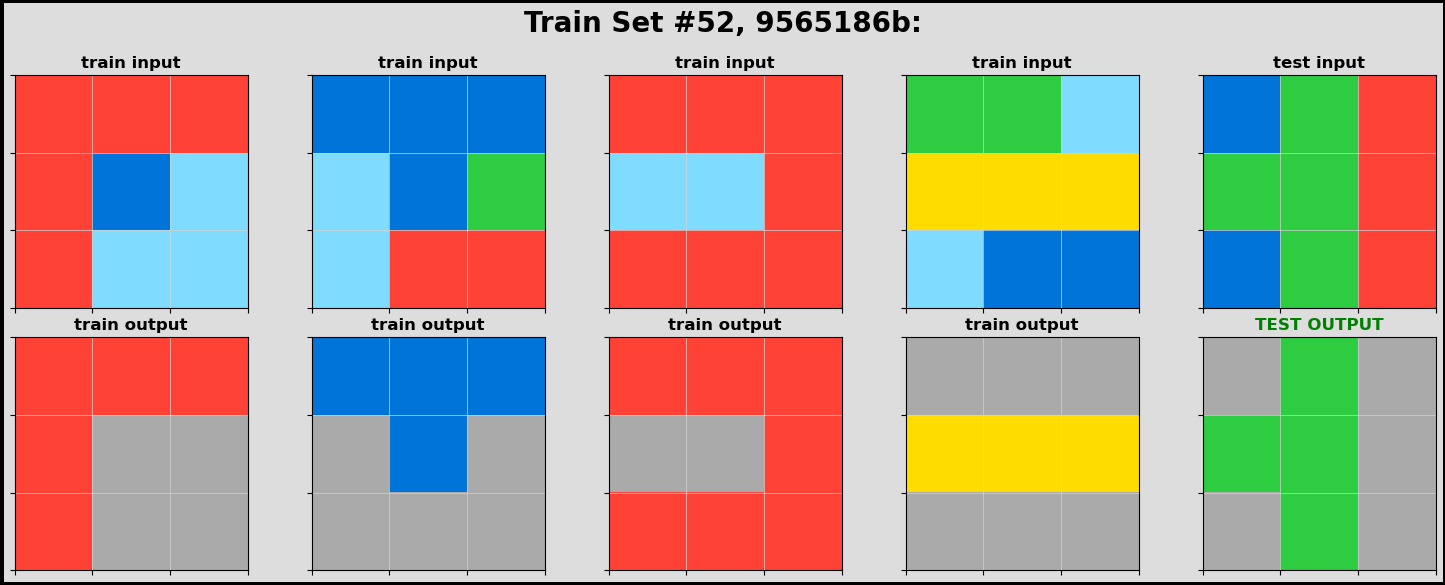

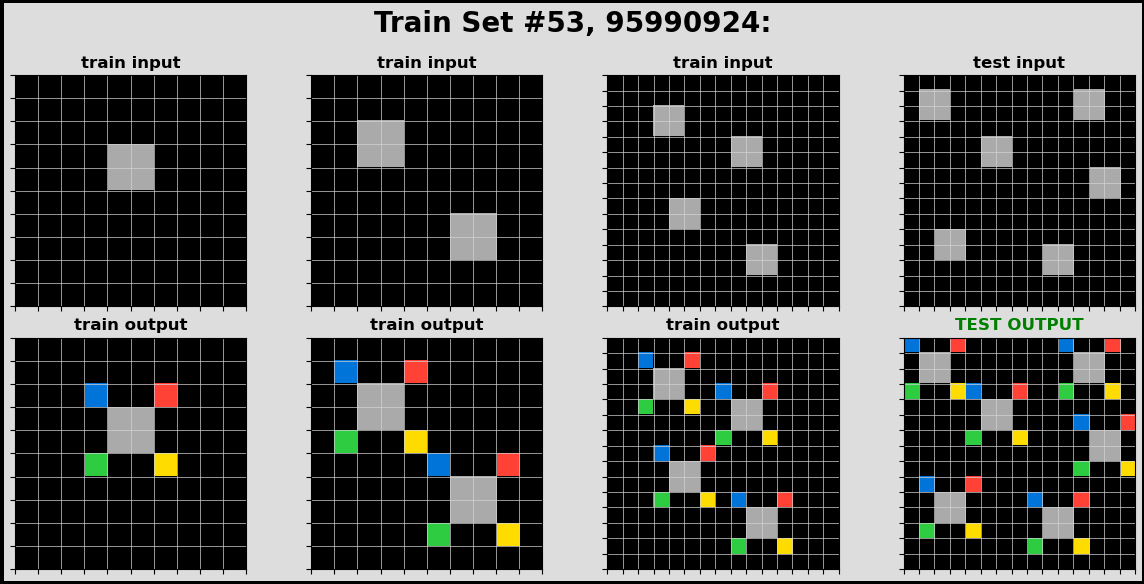

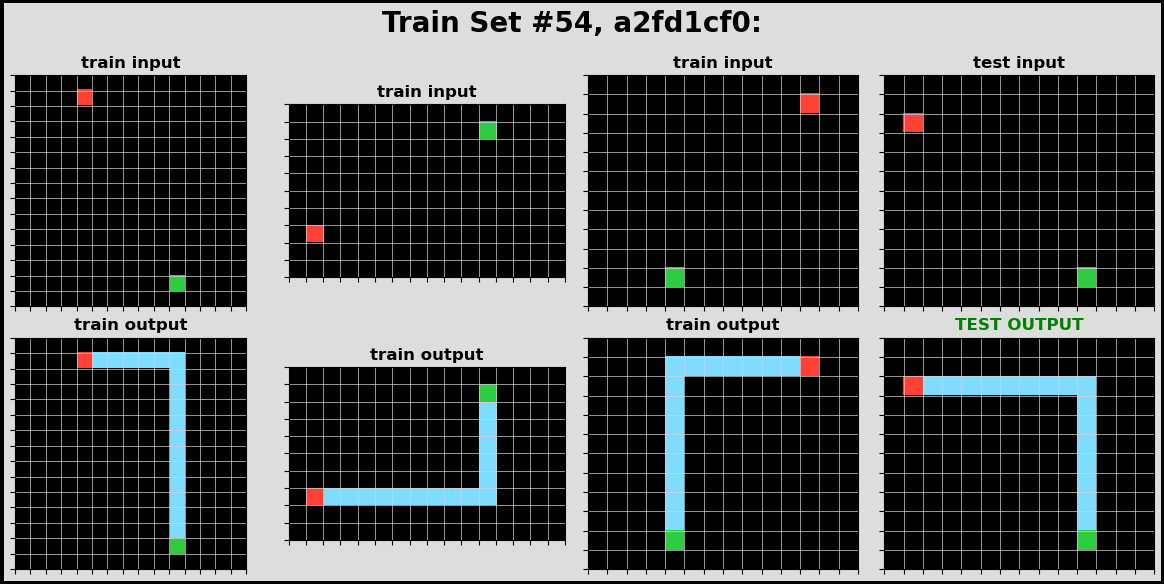

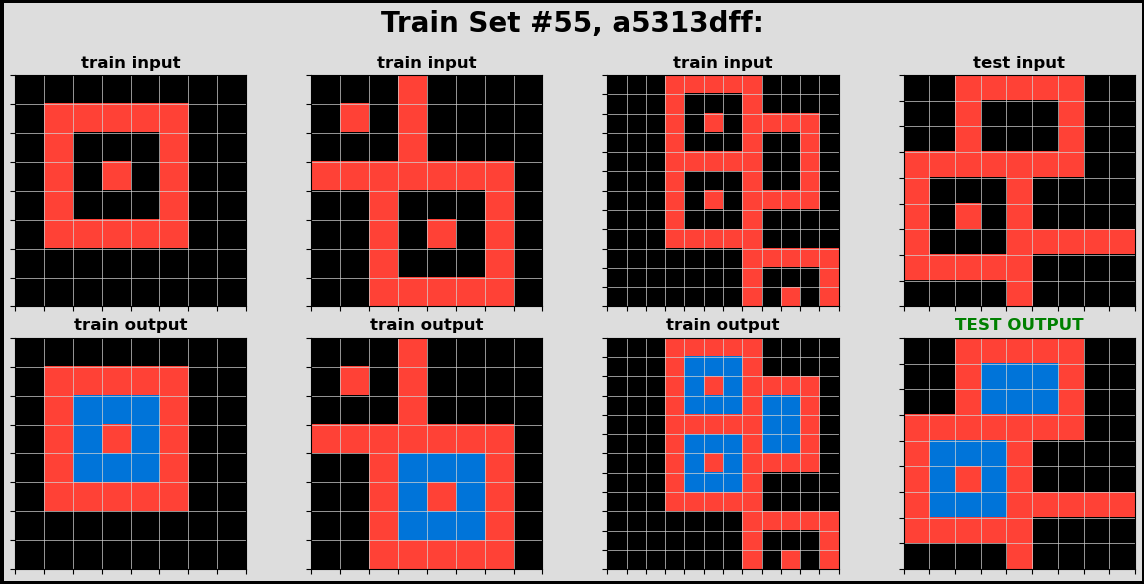

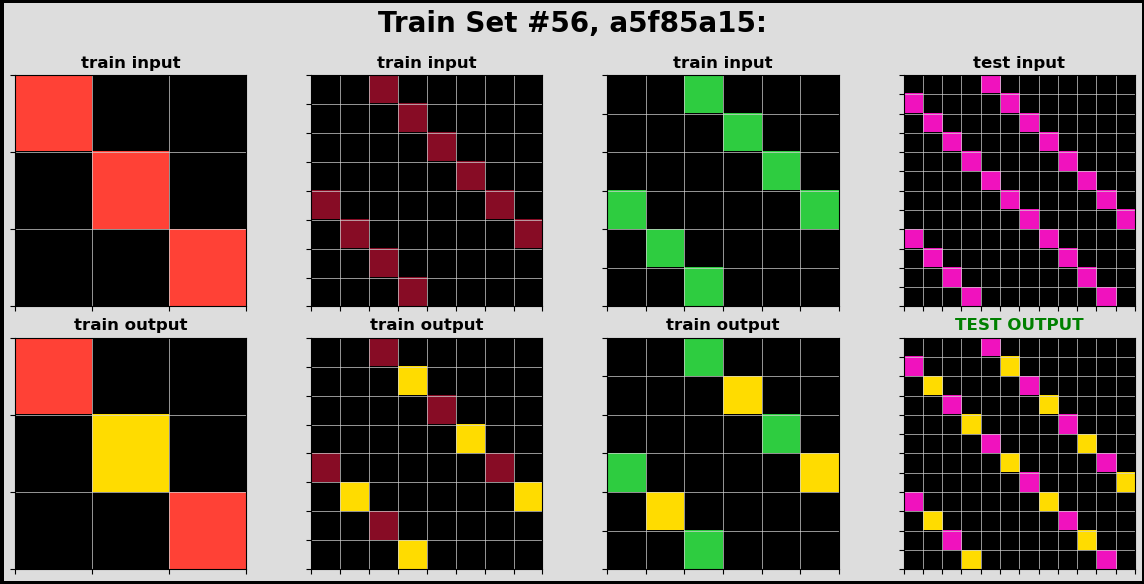

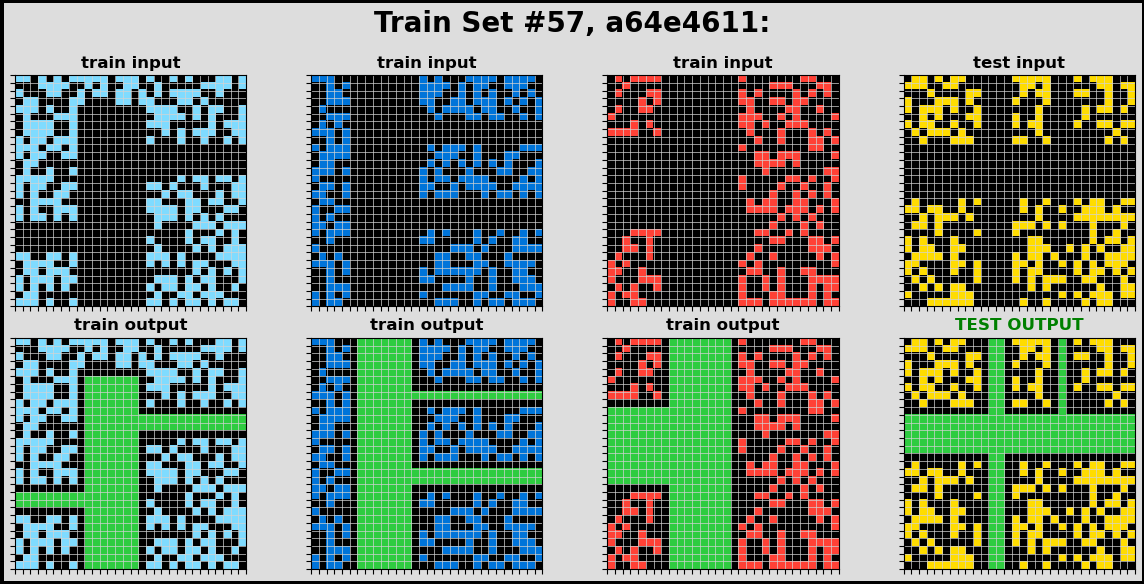

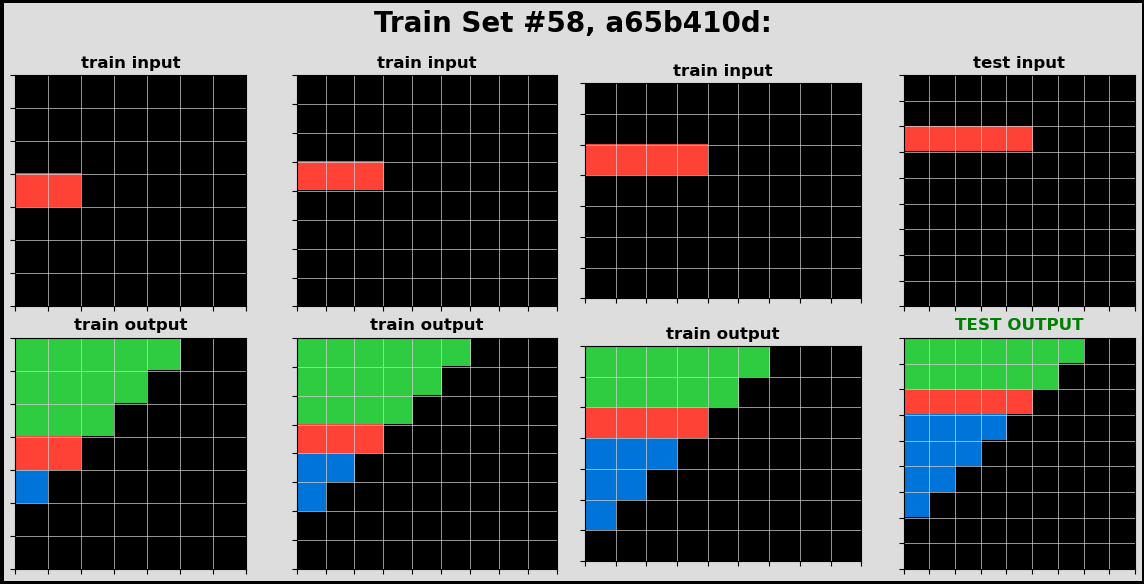

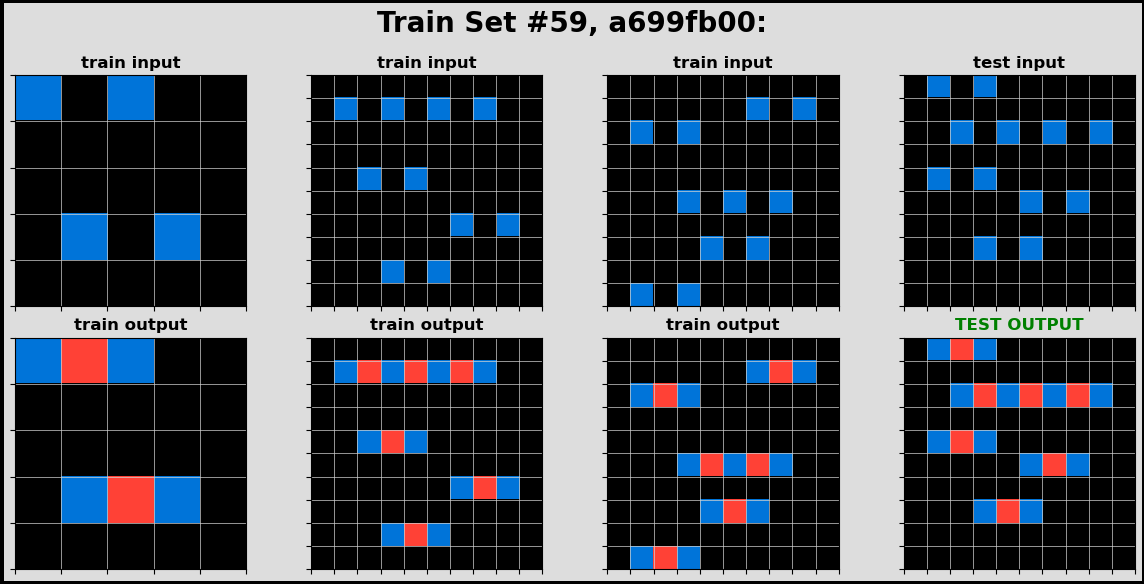

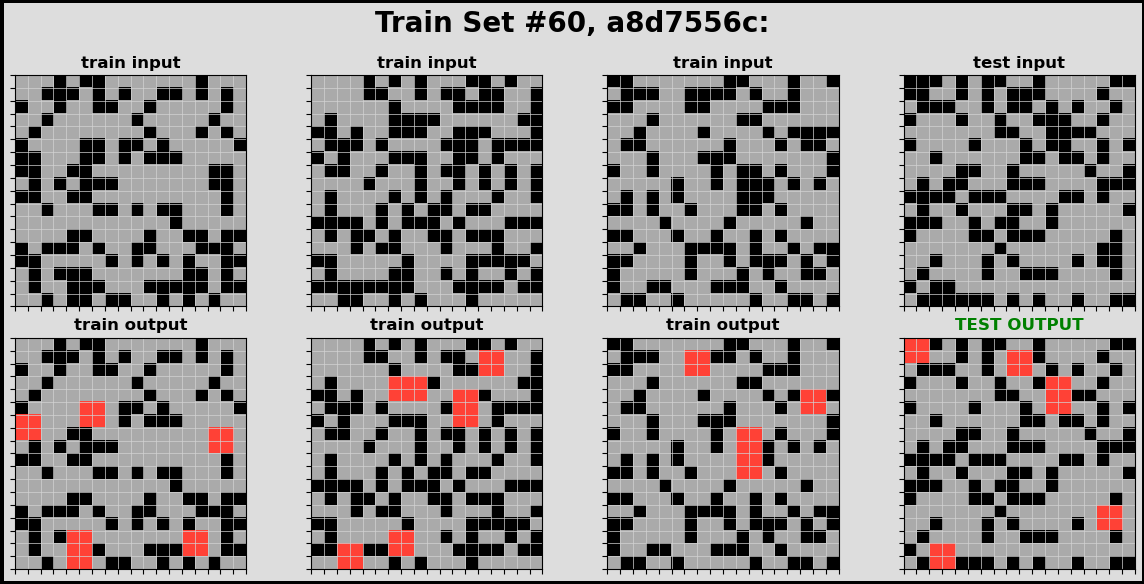

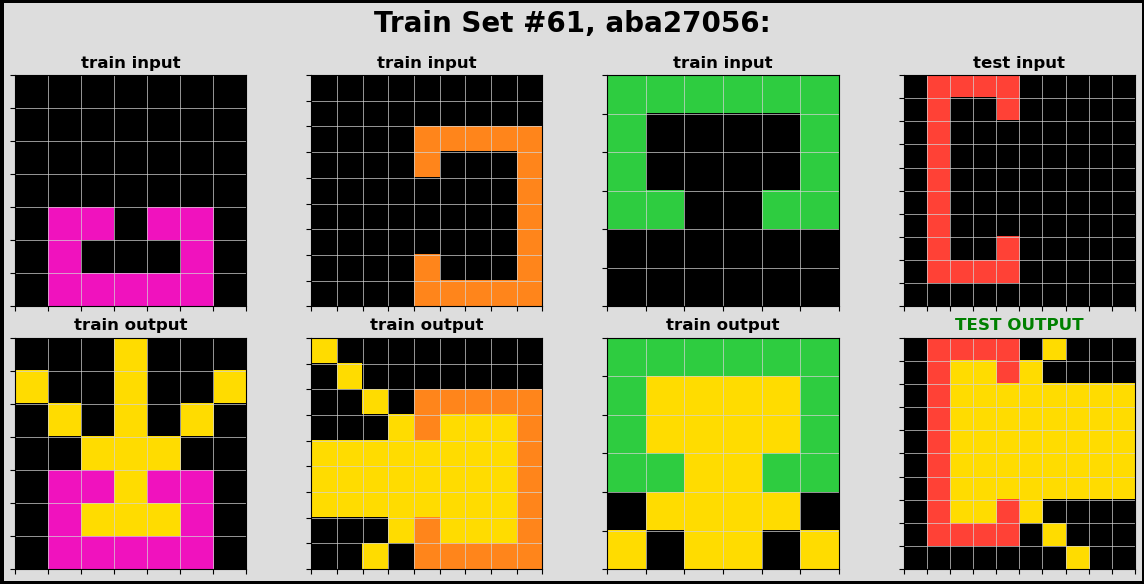

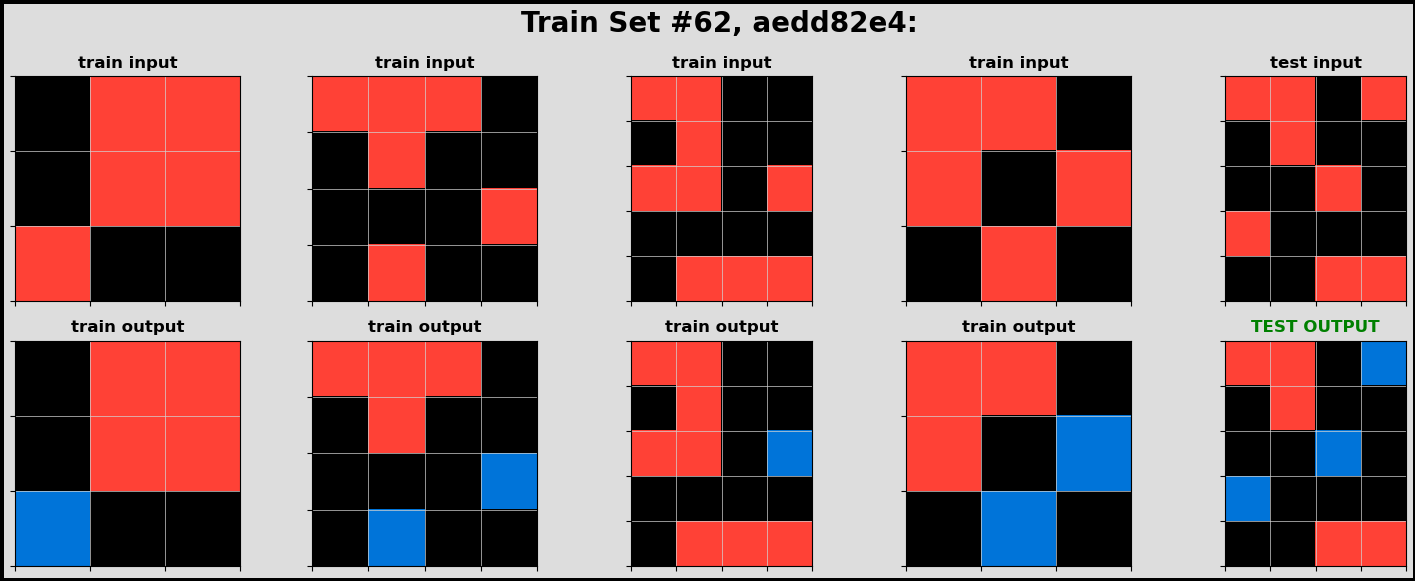

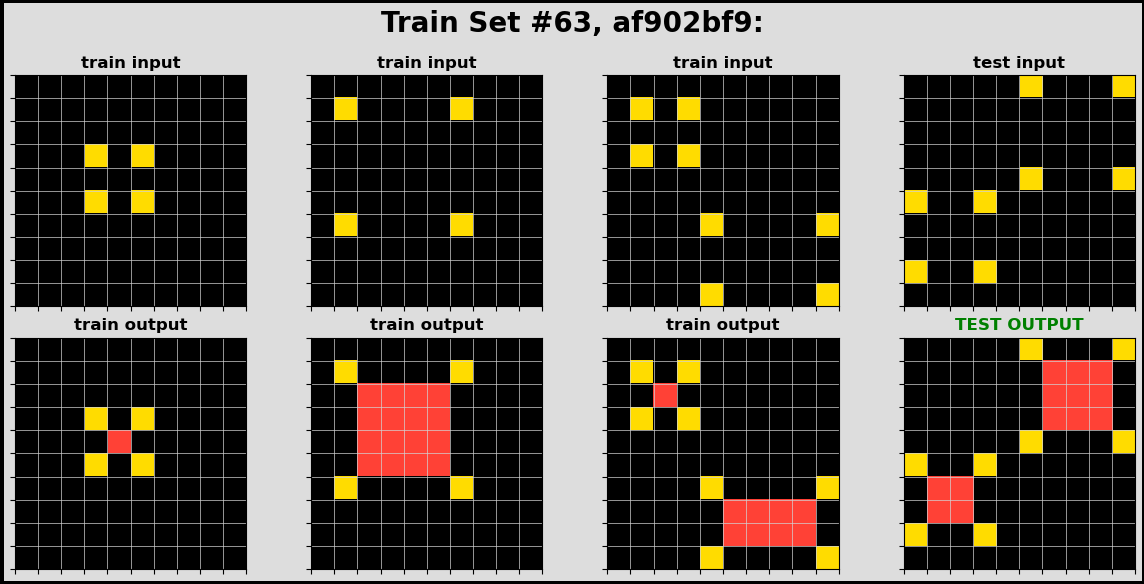

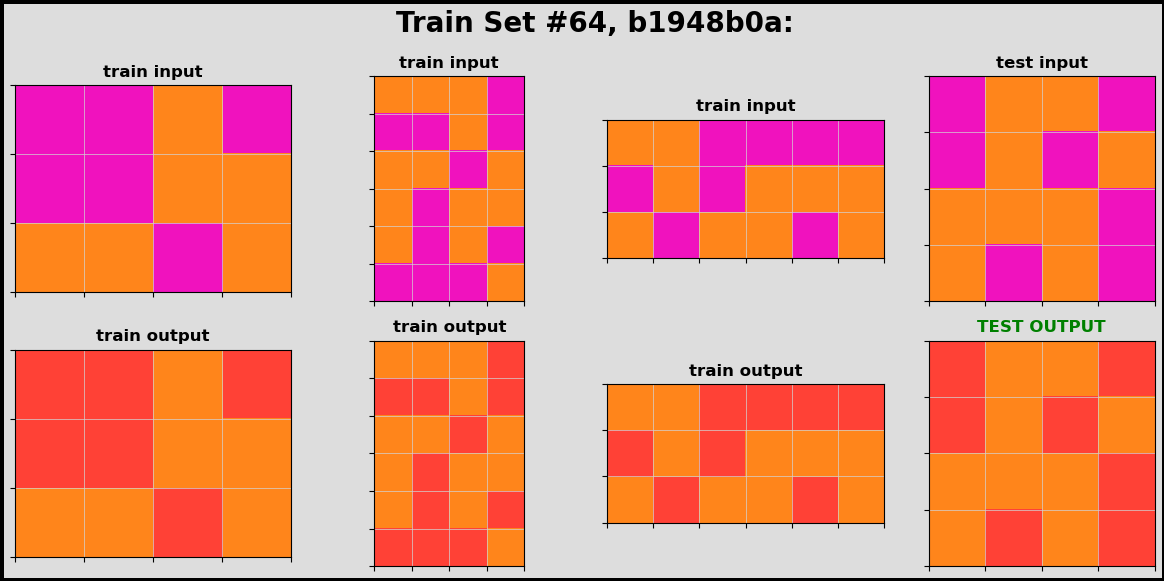

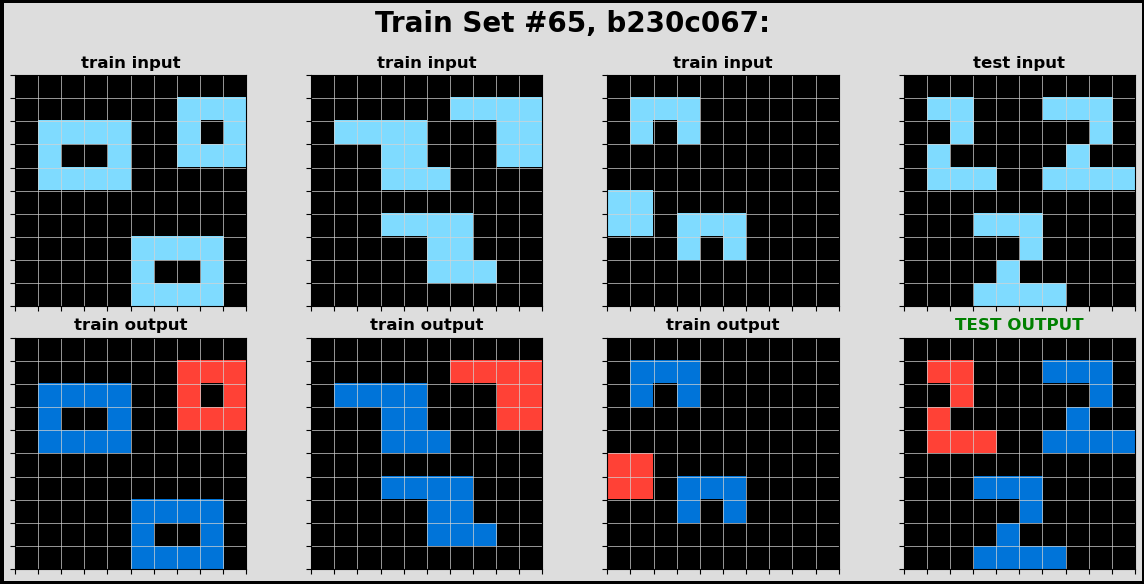

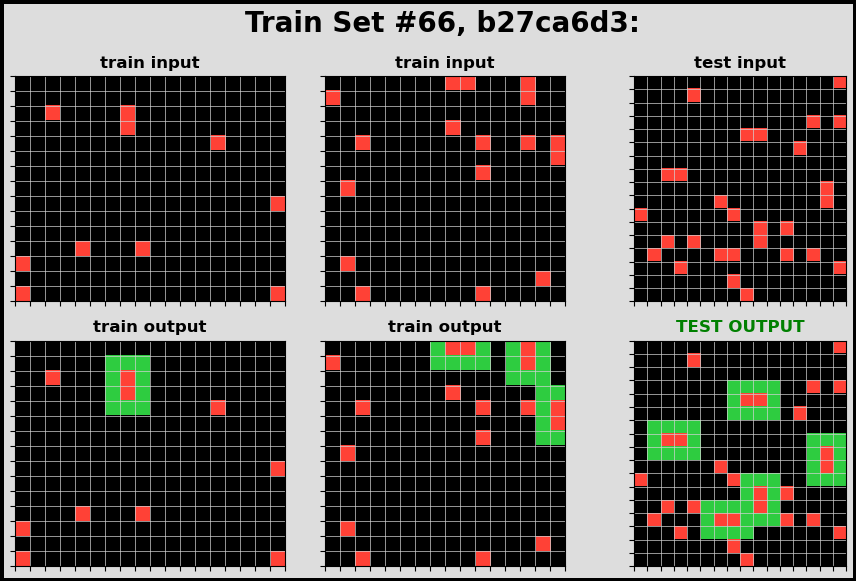

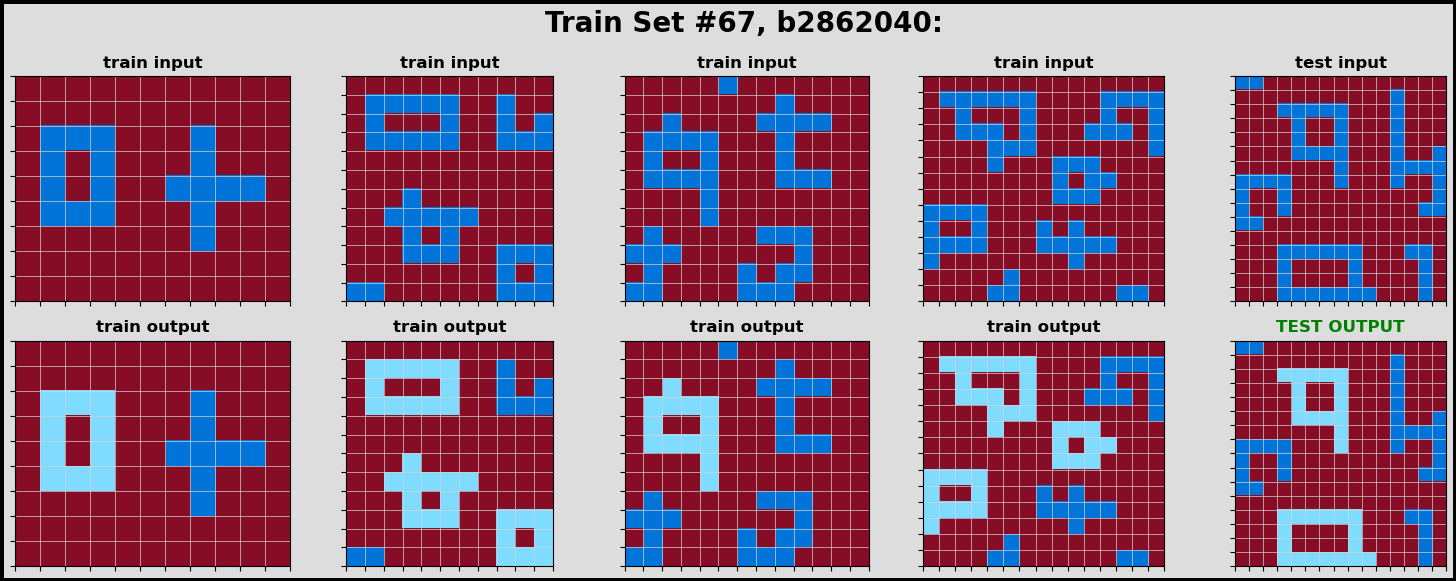

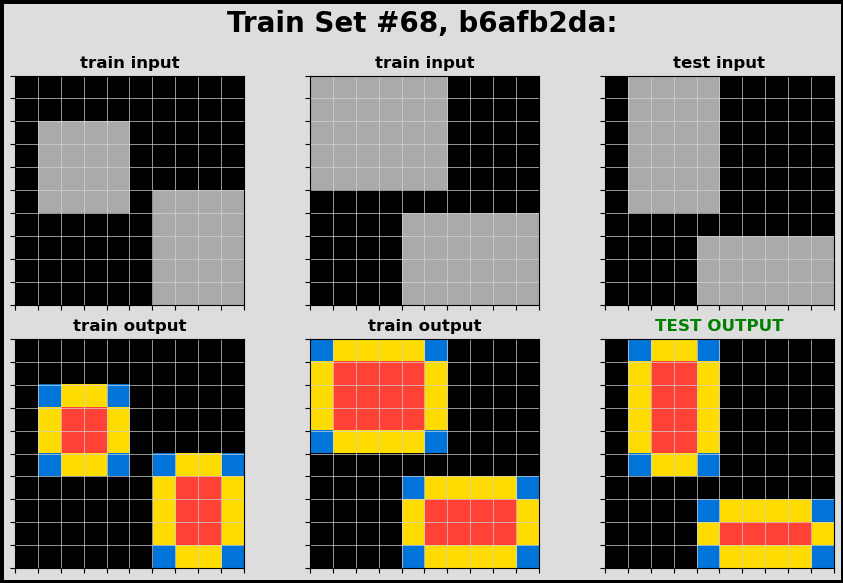

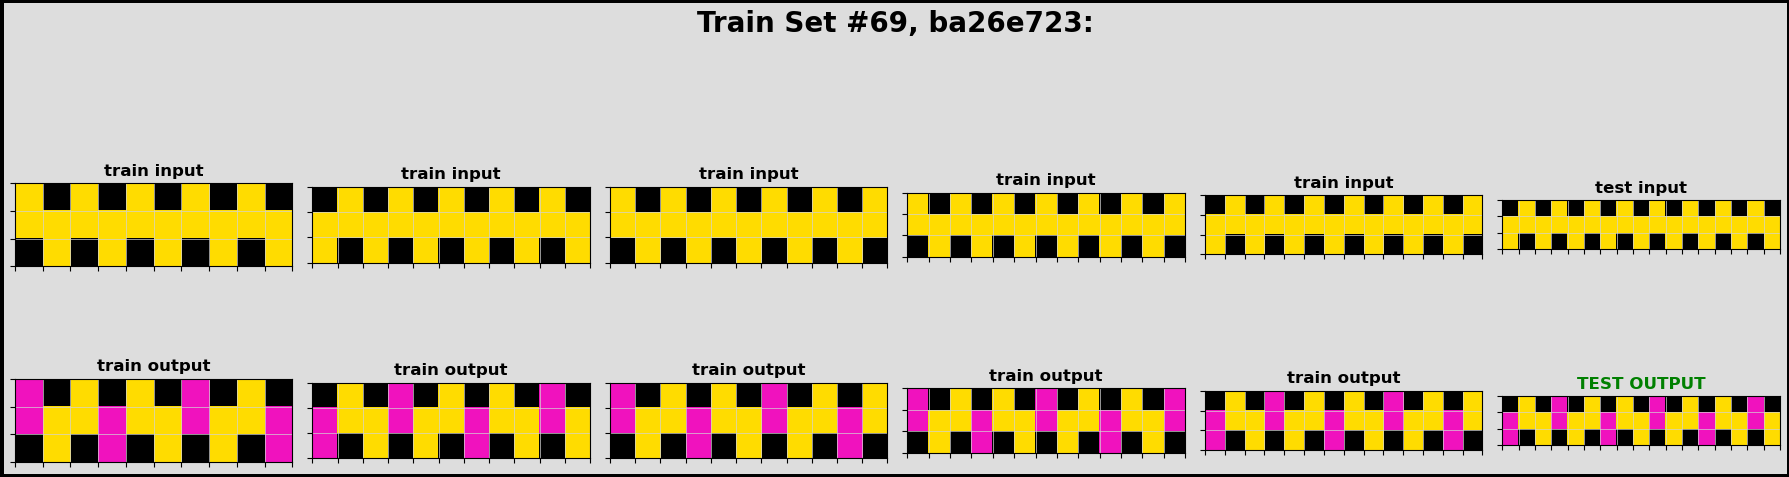

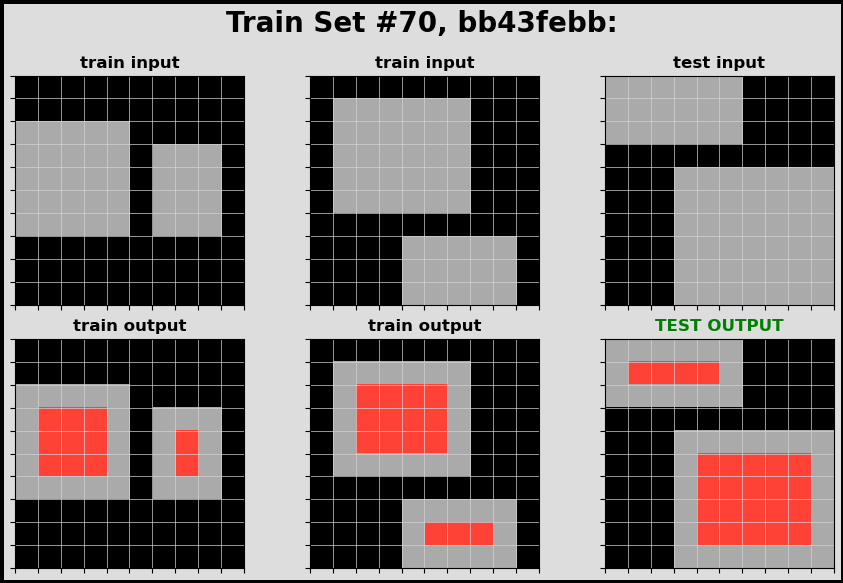

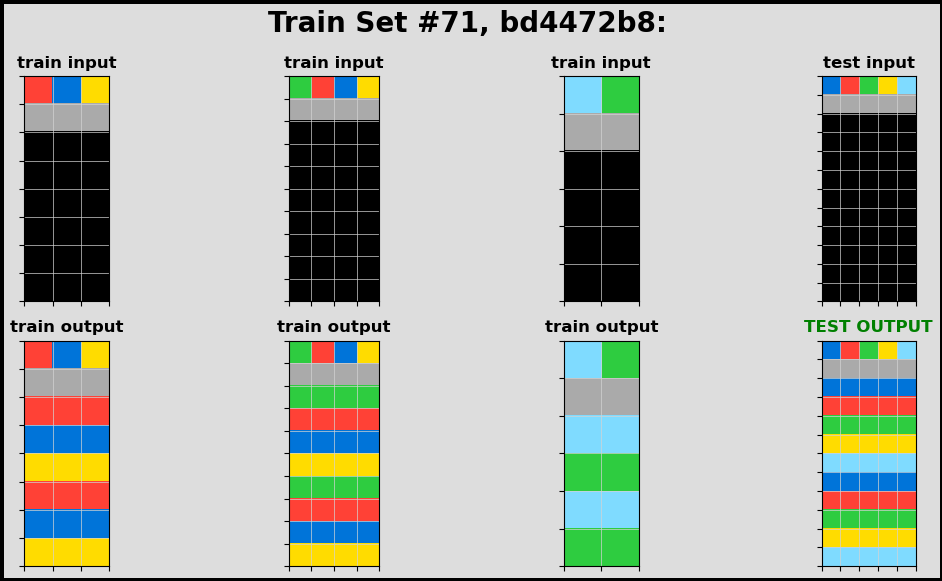

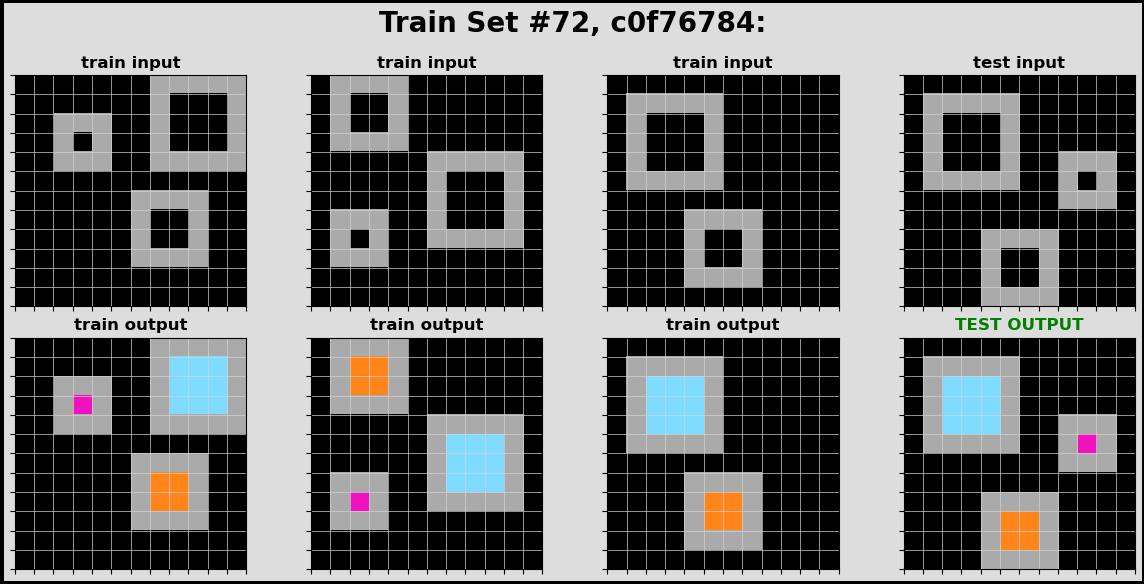

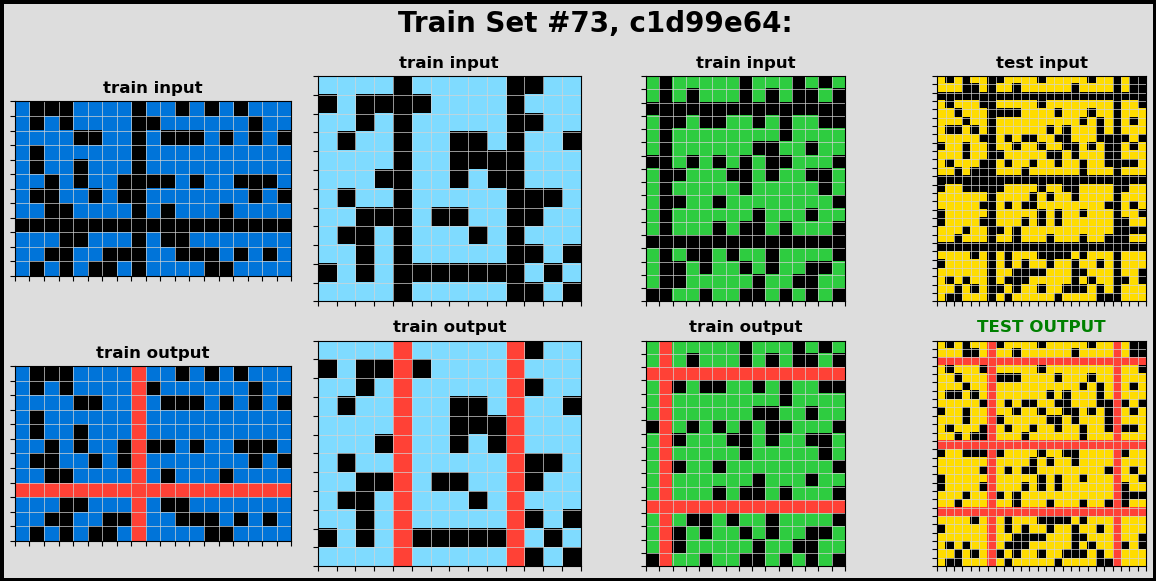

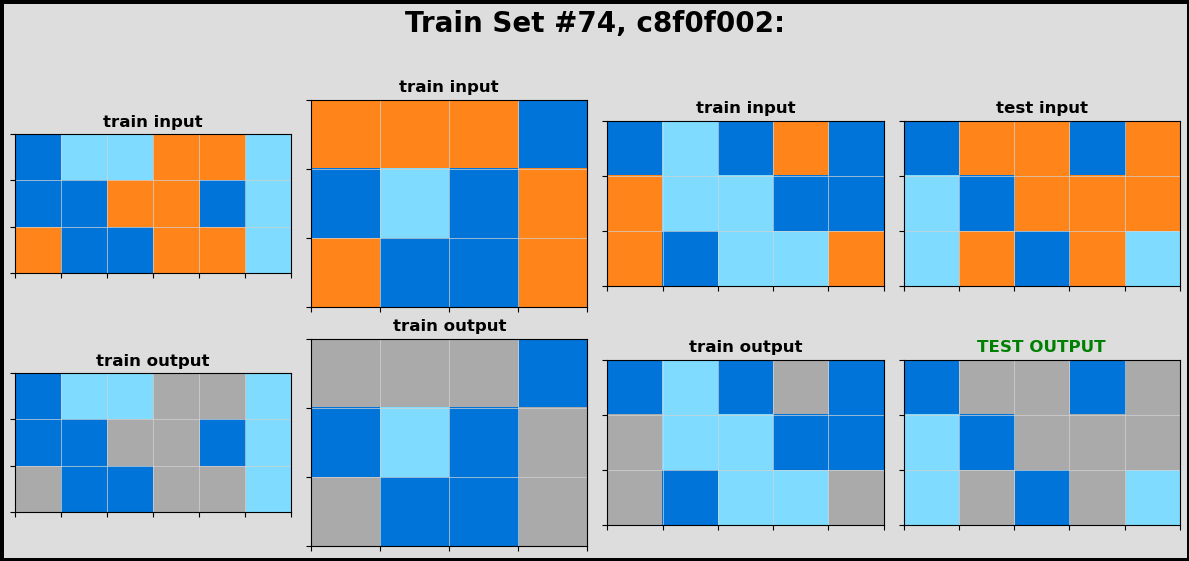

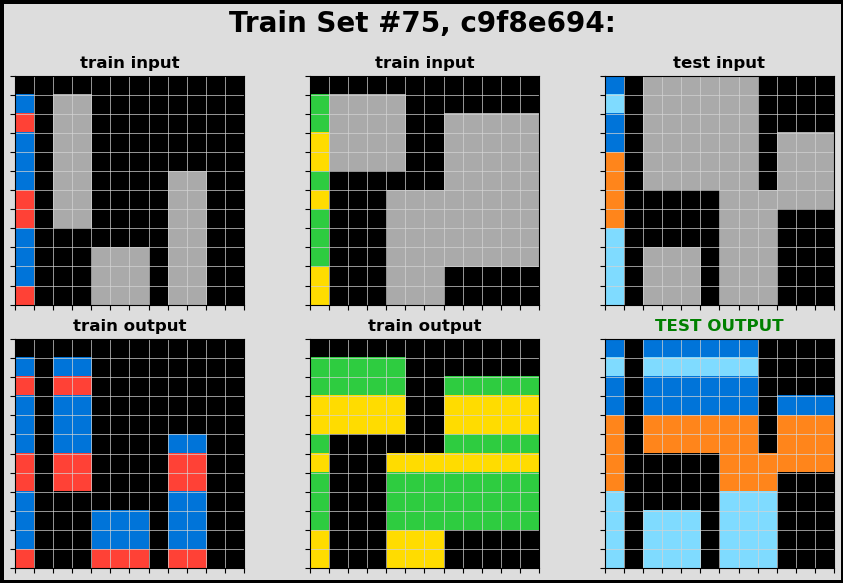

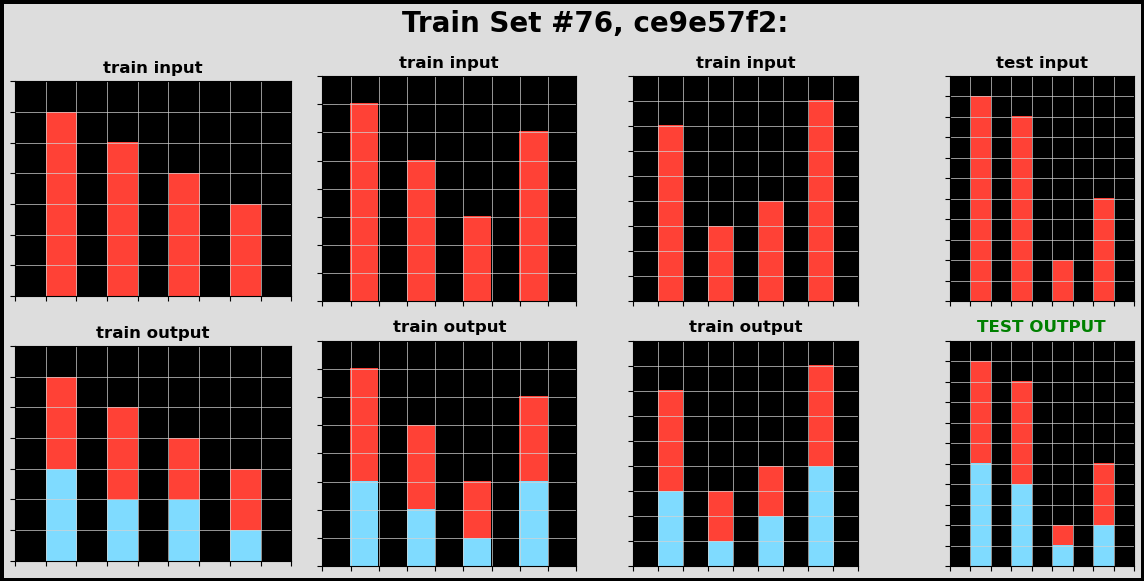

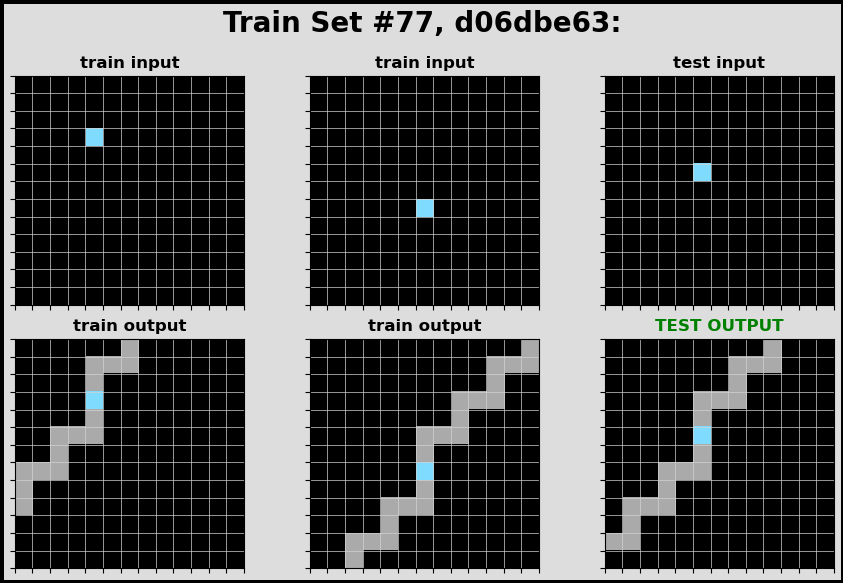

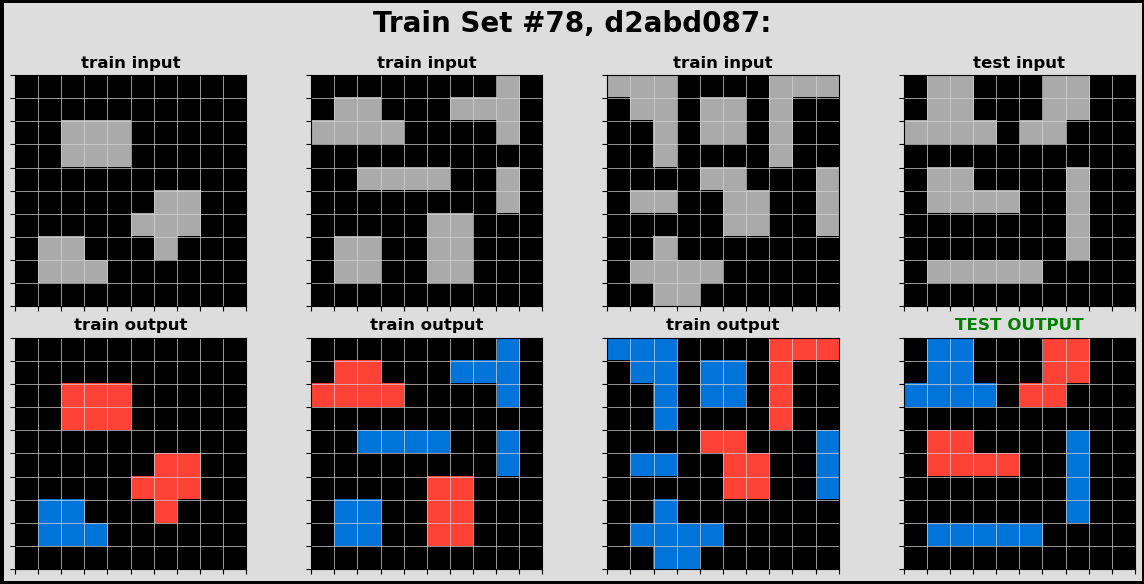

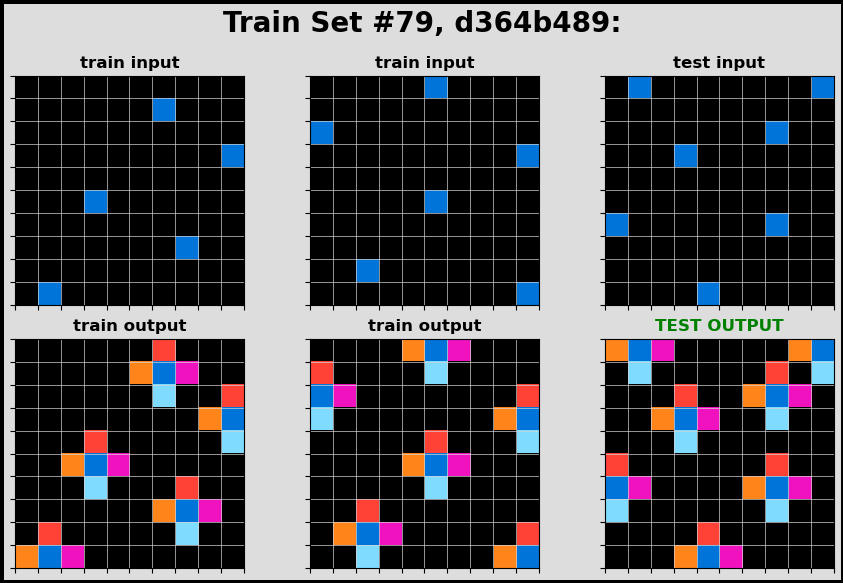

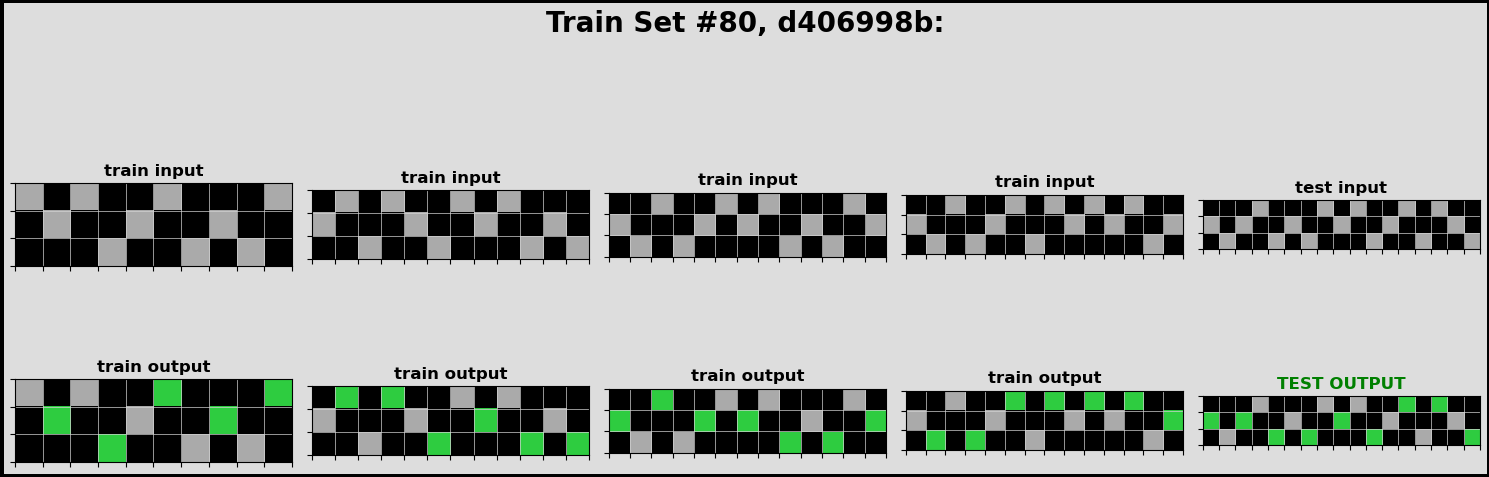

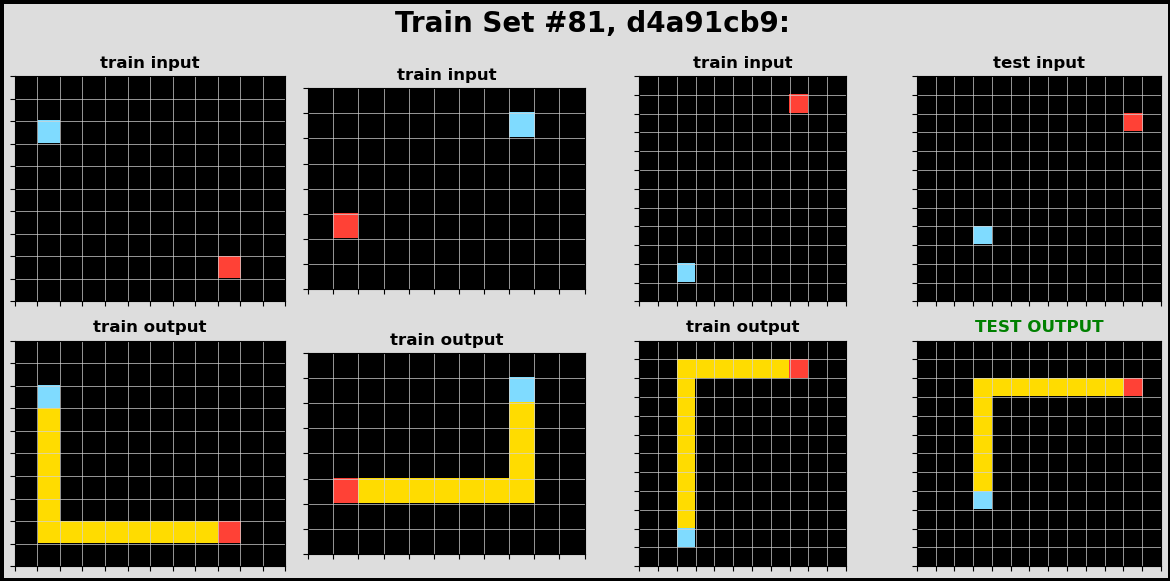

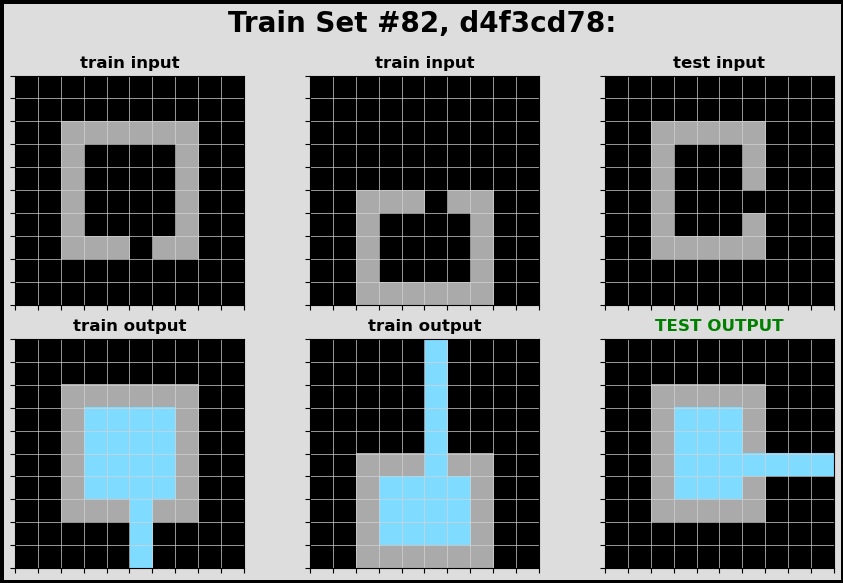

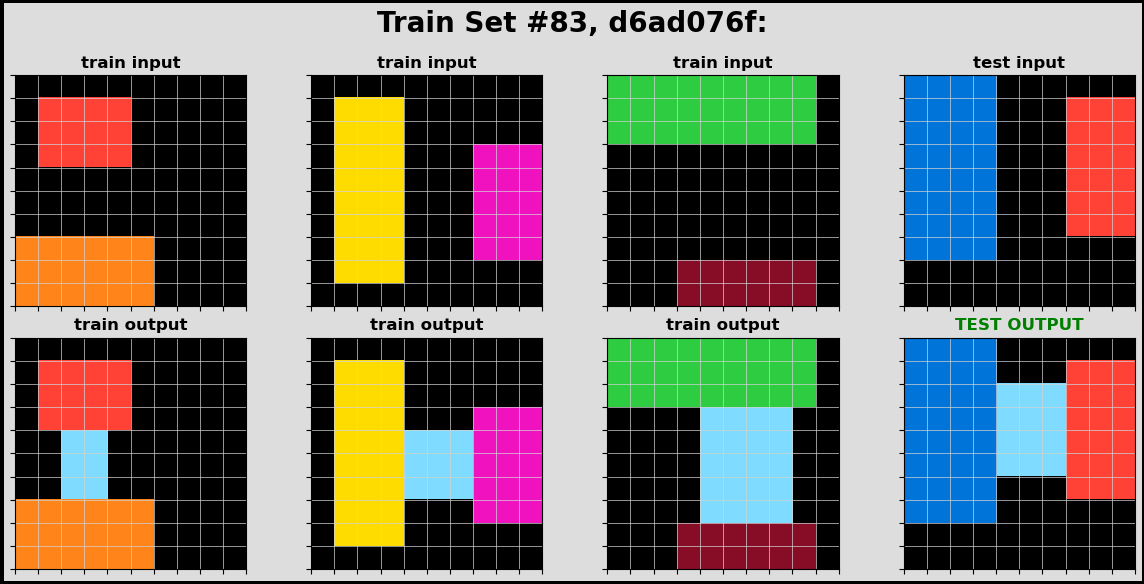

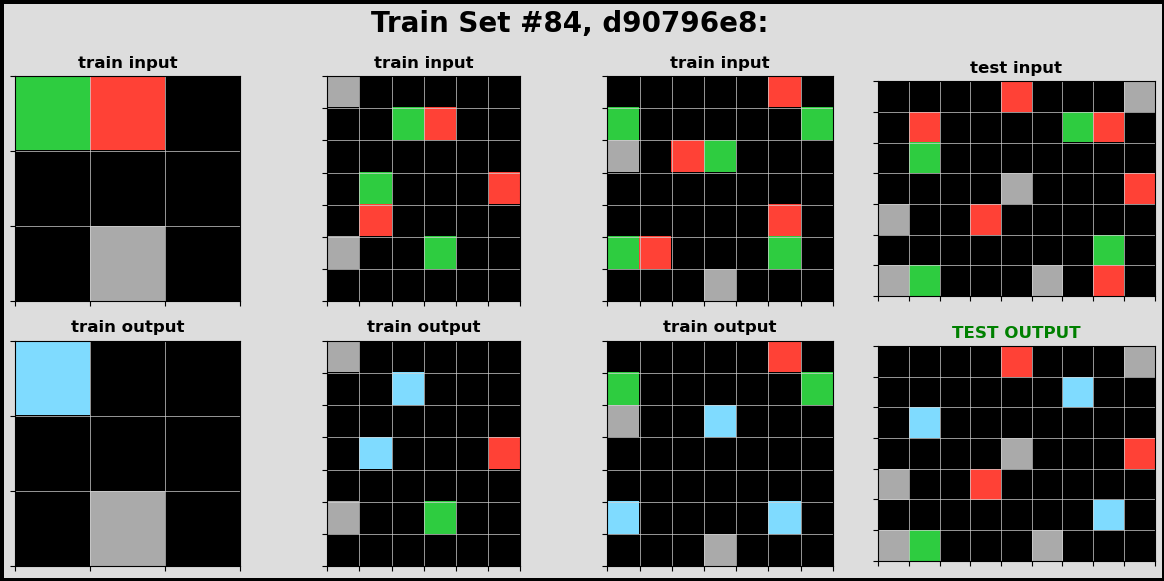

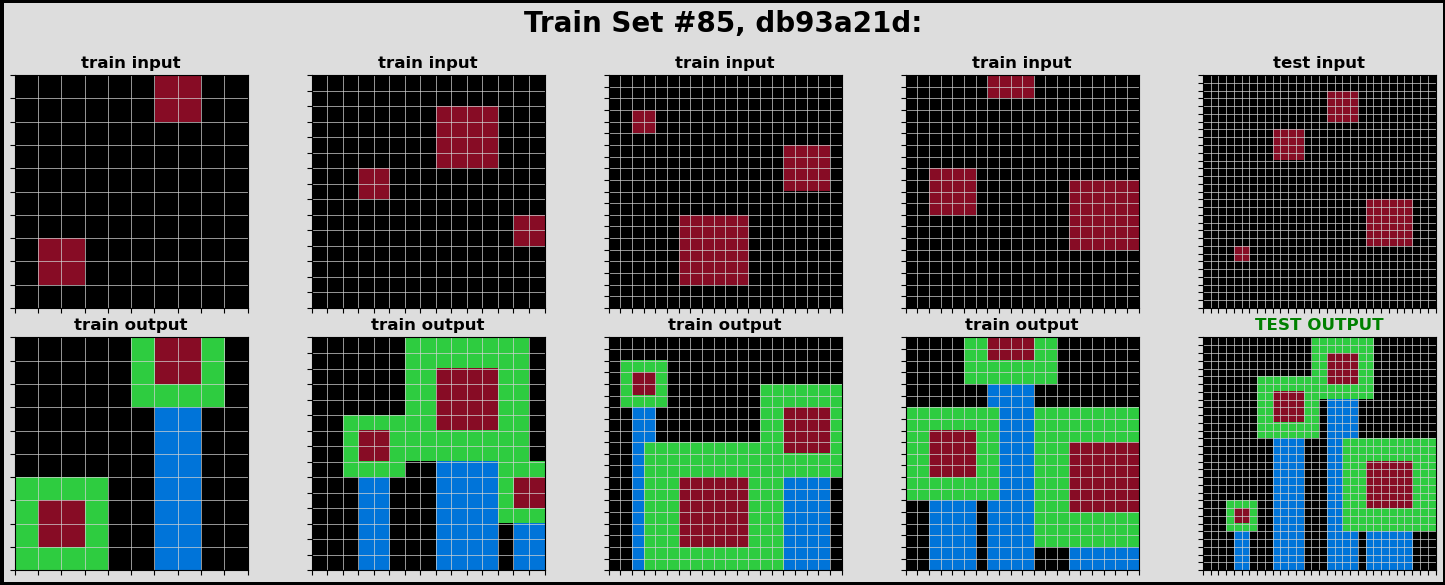

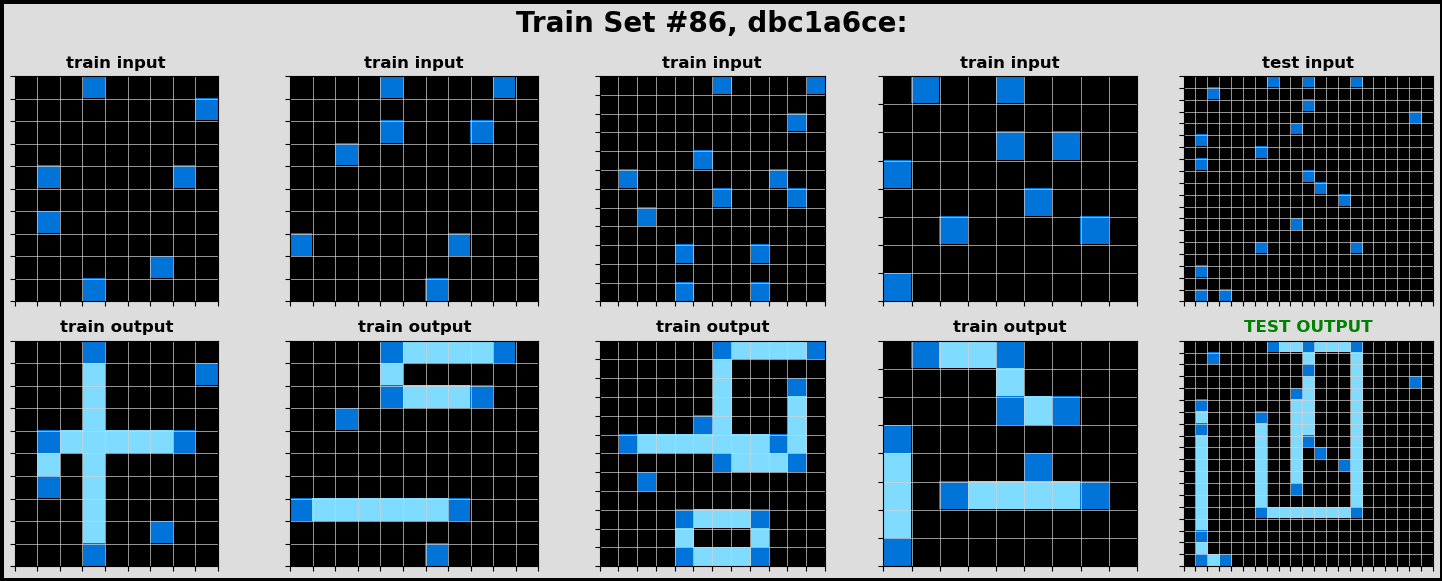

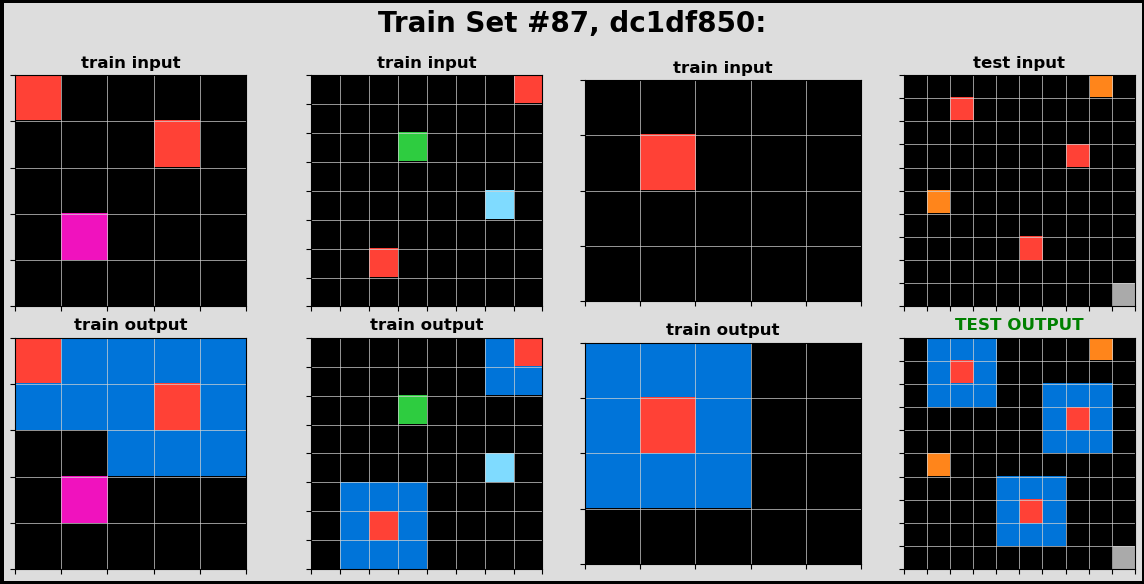

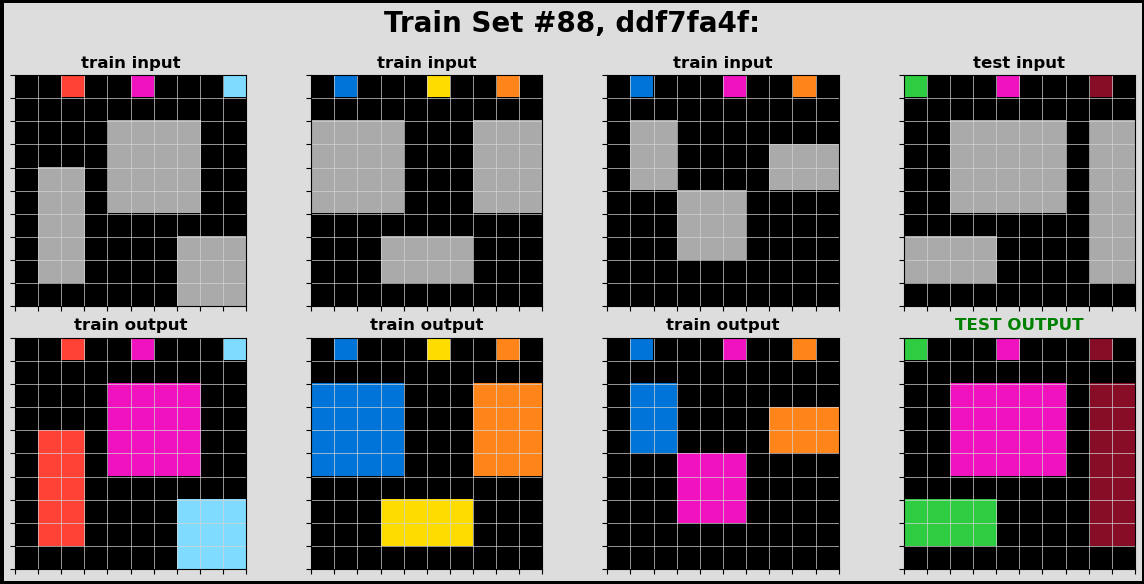

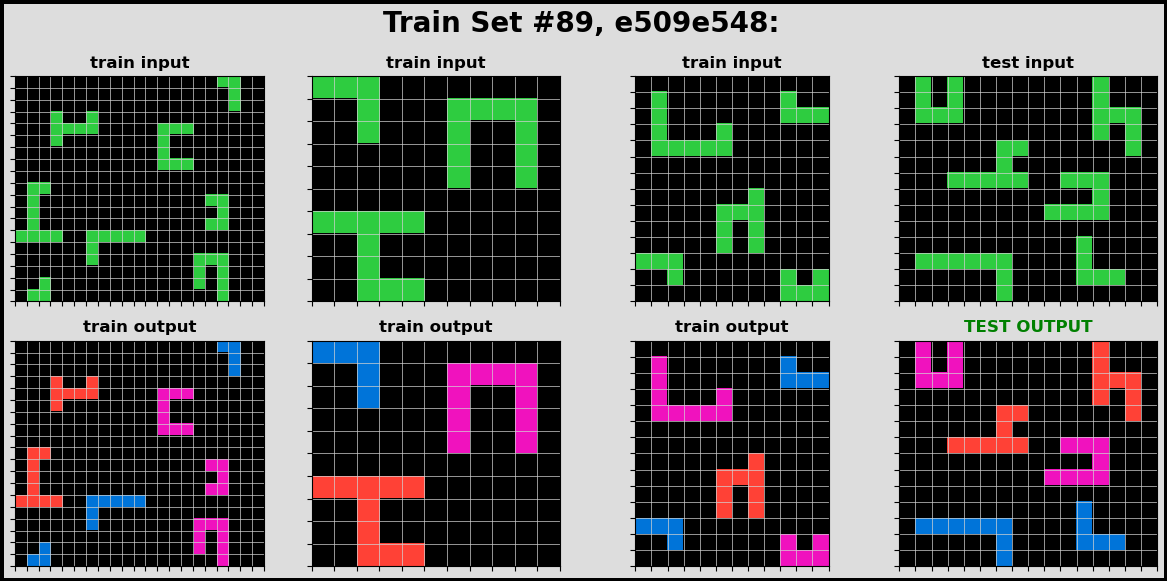

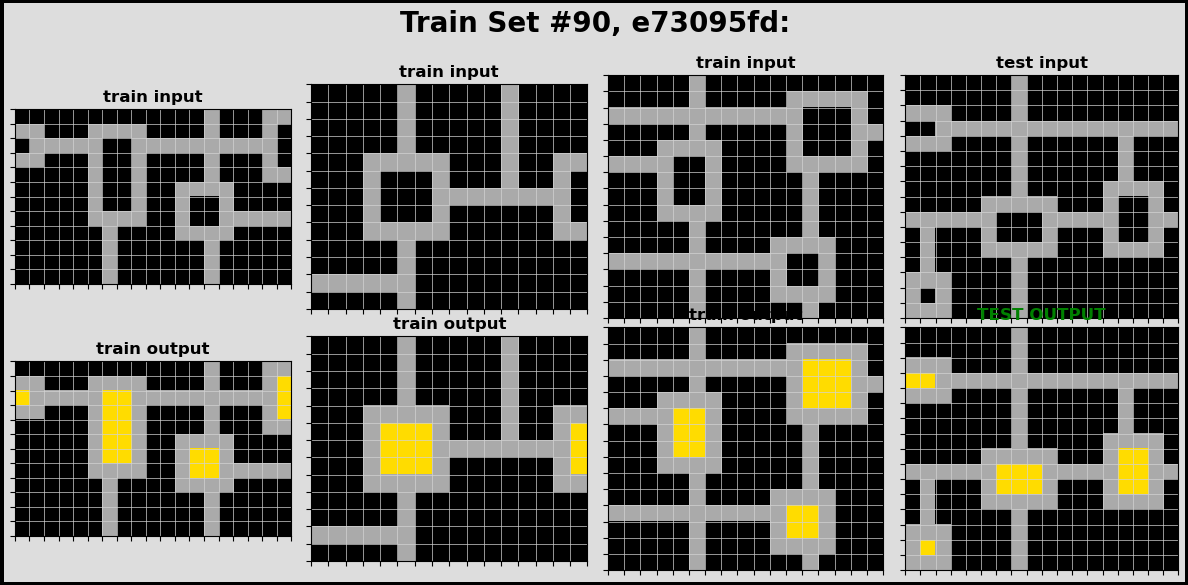

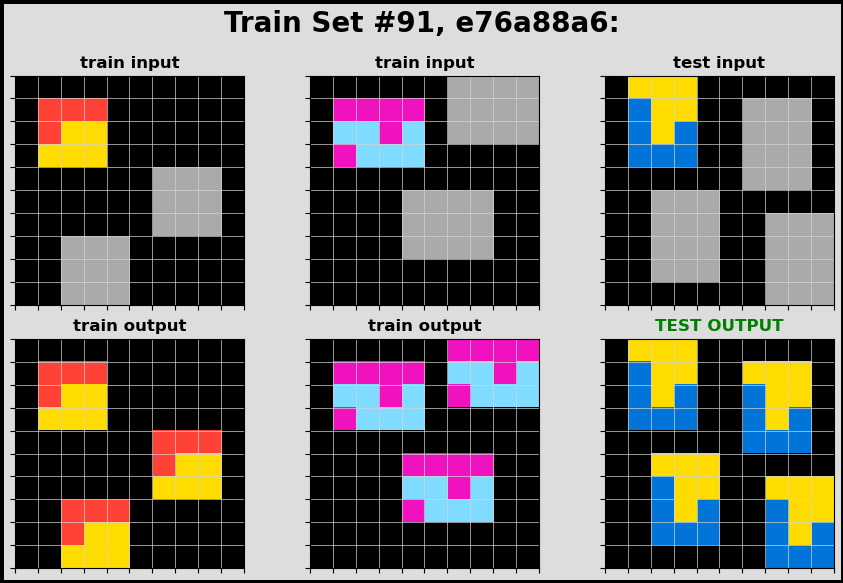

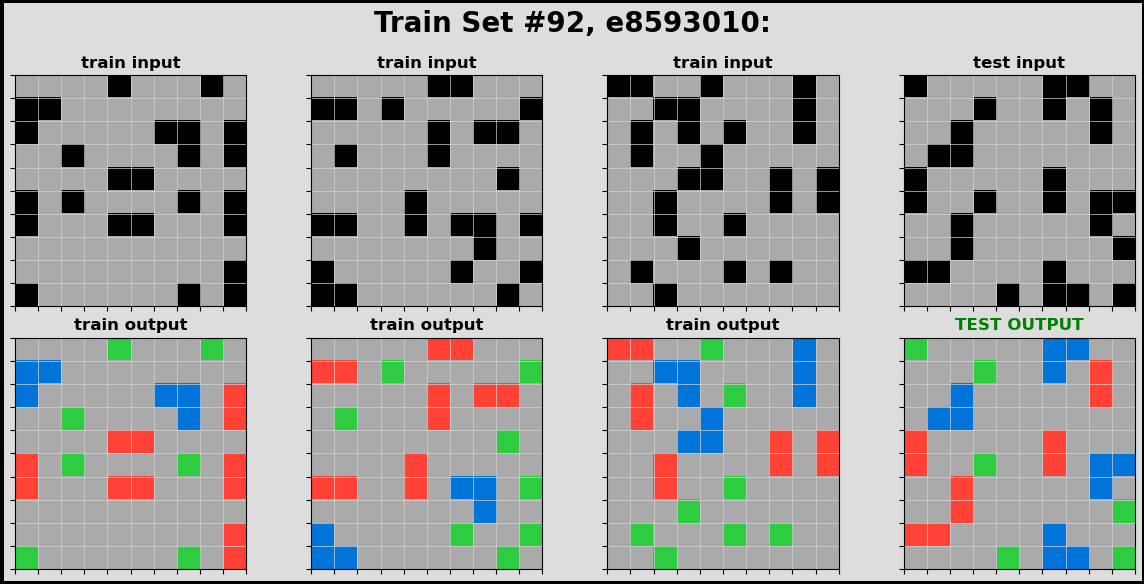

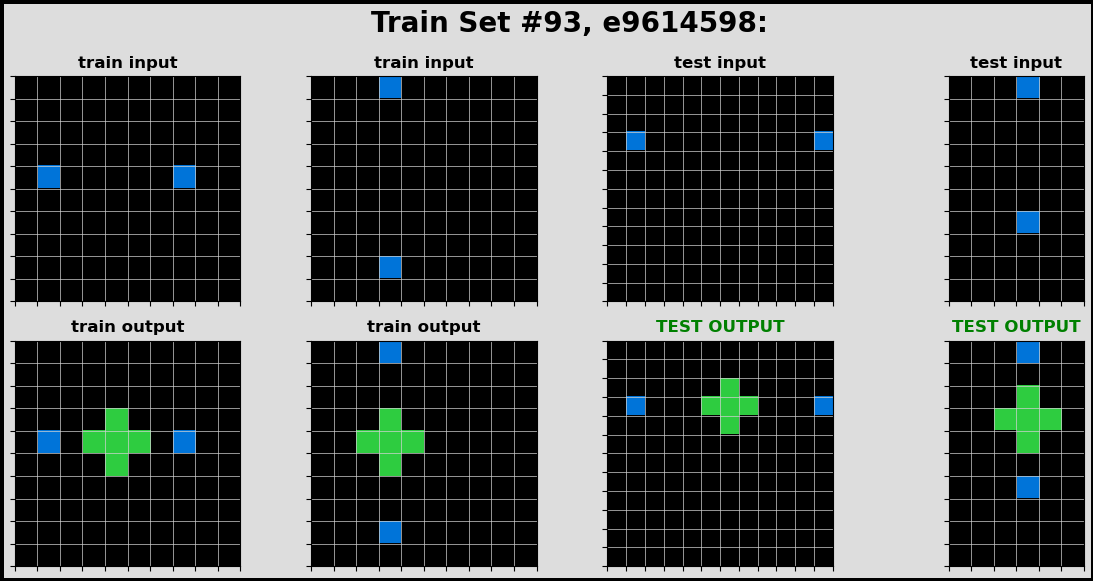

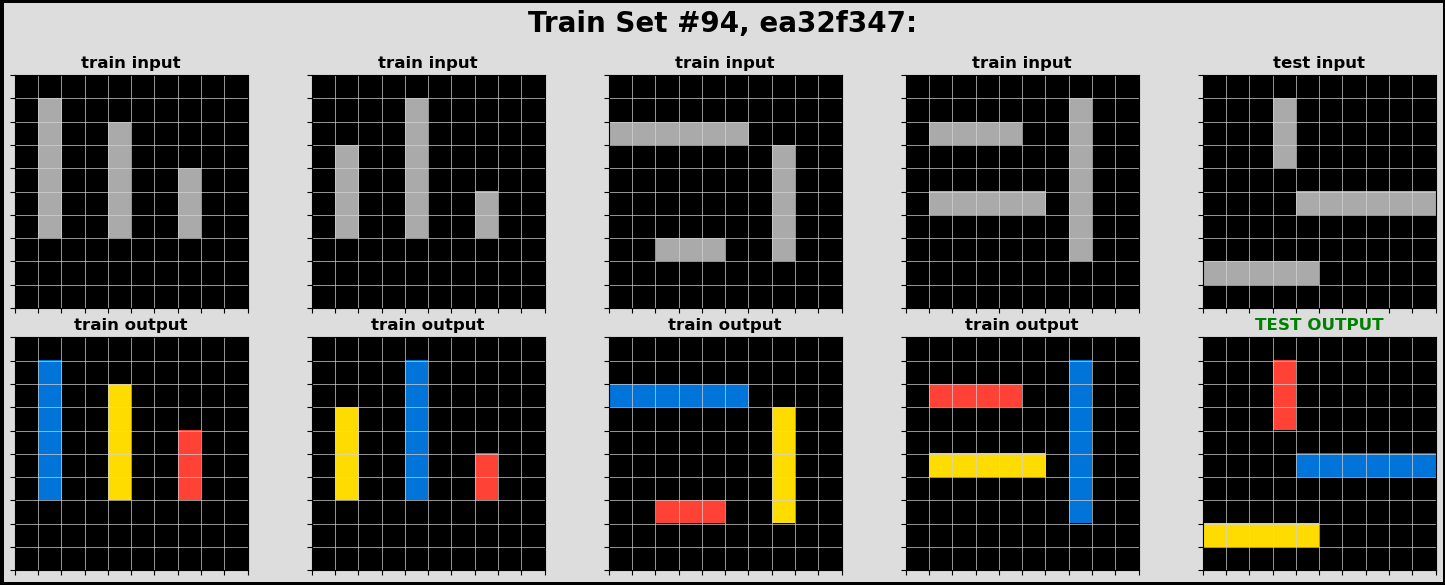

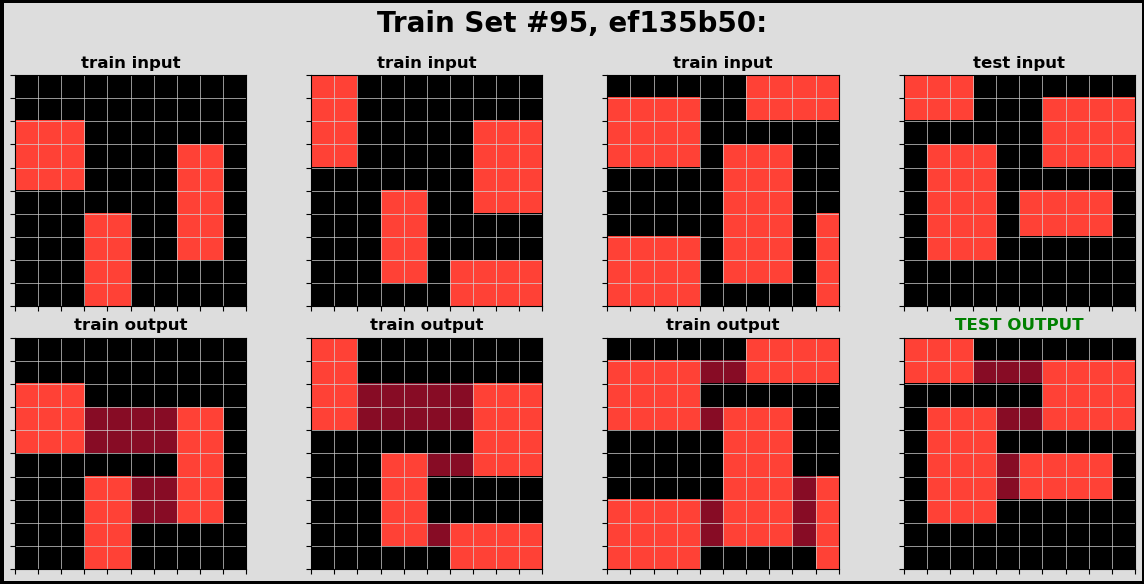

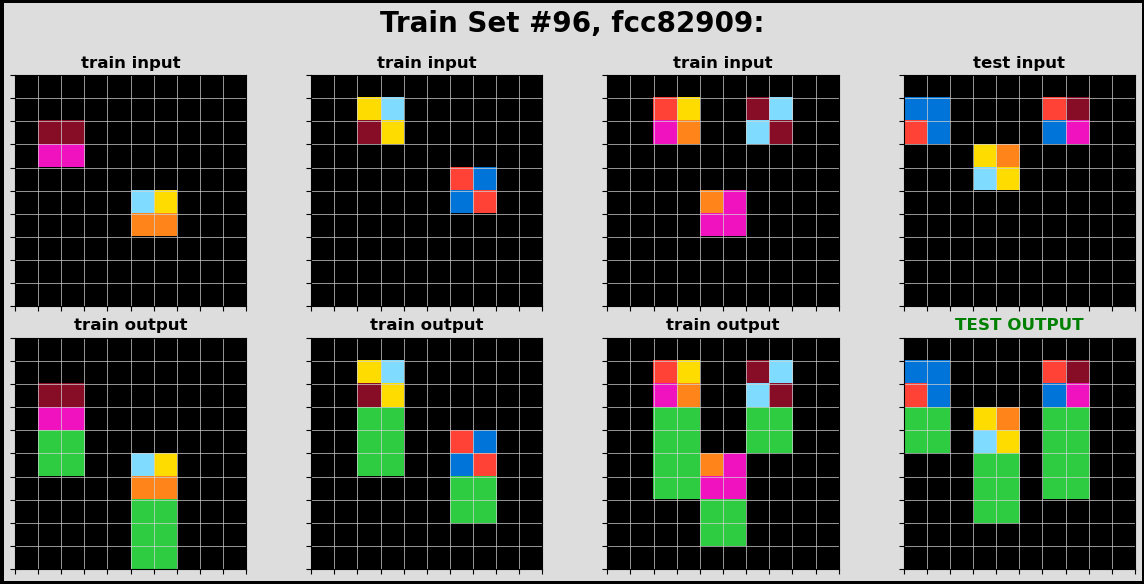

In [4]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

from data import ARCDataset
from rich import print
from arc.utils.visualize import plot_task
from arc.constants import get_challenges_solutions_filepath
from classify import ARCDataClassifier


challenges, solutions = get_challenges_solutions_filepath(data_category='train', base_path='../../data/arc-prize-2024/')

filter_funcs = (
        # ARCDataClassifier.in_data_codes_f(['00d62c1b']),
        ARCDataClassifier.is_same_shape_f(True),
        ARCDataClassifier.is_n_color_stable_f(1),
        # ARCDataClassifier.is_same_number_of_colors_f(True),
        ARCDataClassifier.is_same_colors_f(False),
        # ARCDataClassifier.is_dominent_color_stable_f(True)
)

# Example usage
dataset_train = ARCDataset(challenges, solutions, train=True, one_hot=False, filter_funcs=filter_funcs)
dataset_test = ARCDataset(challenges, solutions, train=False, one_hot=False, filter_funcs=filter_funcs)
print(f'Data size: {len(dataset_train)}')

print(*[dataset_train.task_id(i) for i in range(len(dataset_train))])

# Visualize a task
for index in range(len(dataset_train)):
    # xs = [task[0] for task in dataset_train[index]]
    # ys = [task[1] for task in dataset_train[index]]
    plot_task(dataset_train, dataset_test, index, data_category='train')